In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
df2=pd.read_excel("Contraceptive_method_dataset.xlsx")

In [3]:
df2

Wife_age Wife_ education Husband_education  No_of_children_born  \
0         24.0         Primary         Secondary                  3.0   
1         45.0      Uneducated         Secondary                 10.0   
2         43.0         Primary         Secondary                  7.0   
3         42.0       Secondary           Primary                  9.0   
4         36.0       Secondary         Secondary                  8.0   
...        ...             ...               ...                  ...   
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0      Scientology           No                   2                     High   
1      Scientology           No                   3                Very High   
2      Scientology           No                   3                Very High   
3      Scientology           No                   3                     High   
4      Scientology           No                   3                      Low   
...            ...          ...                 ...                      ...   
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
0            Exposed                        No  
1            Exposed                        No  
2            Exposed                        No  
3            Exposed                        No  
4            Exposed                        No  
...              ...                       ...  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes  

[1473 rows x 10 columns]

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [6]:
import pandas as pd

# Check shape
print("Shape of the dataset:")
print(df2.shape)
print()

# Check data types
print("Data types of each column:")
print(df2.dtypes)
print()

# Statistical summary
print("Statistical summary of numerical columns:")
print(df2.describe())



Shape of the dataset:
(1473, 10)

Data types of each column:
Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object

Statistical summary of numerical columns:
          Wife_age  No_of_children_born  Husband_Occupation
count  1402.000000          1452.000000         1473.000000
mean     32.606277             3.254132            2.137814
std       8.274927             2.365212            0.864857
min      16.000000             0.000000            1.000000
25%      26.000000             1.000000            1.000000
50%      32.000000             3.000000            2.000000
75%      39.000000             4.000000            3.000000
max      49.000000            16

In [8]:
print(df2.columns)

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')


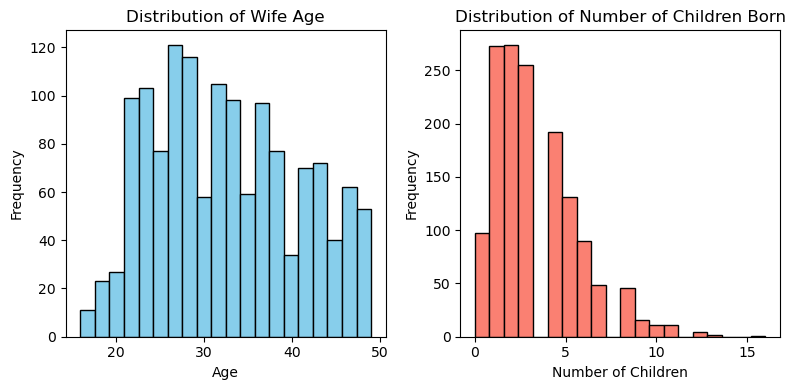

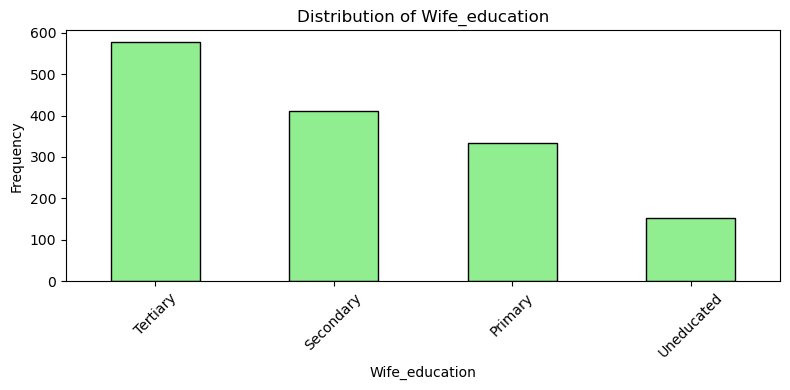

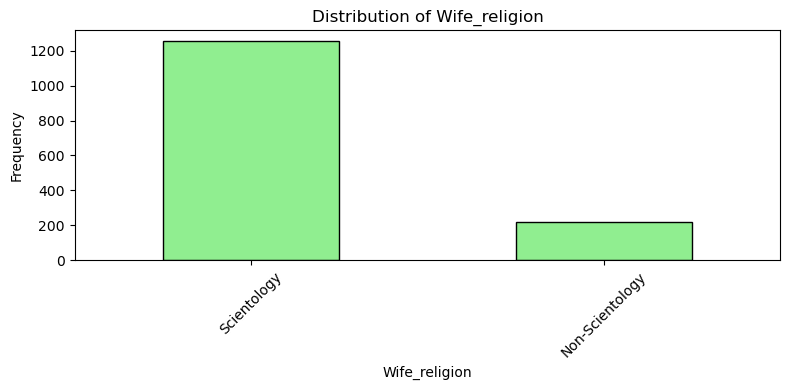

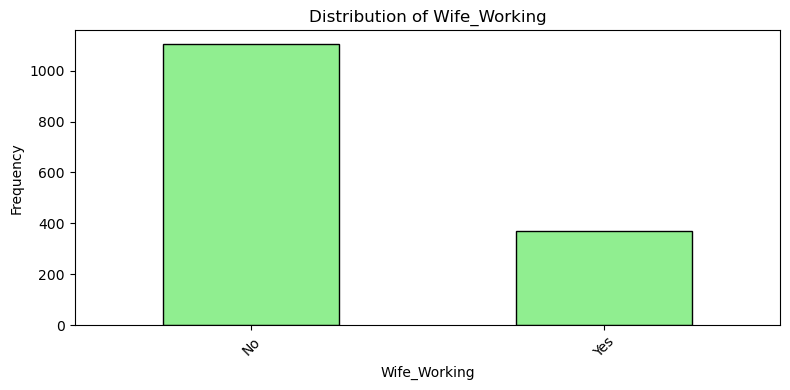

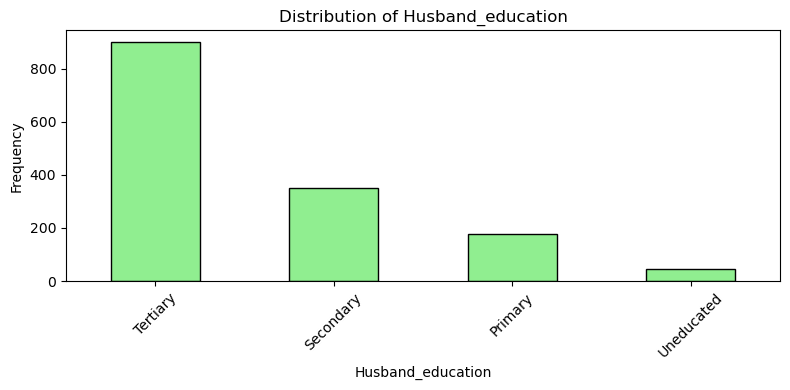

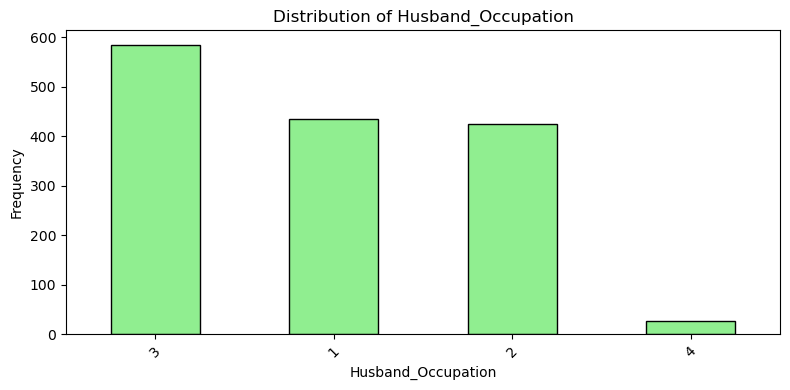

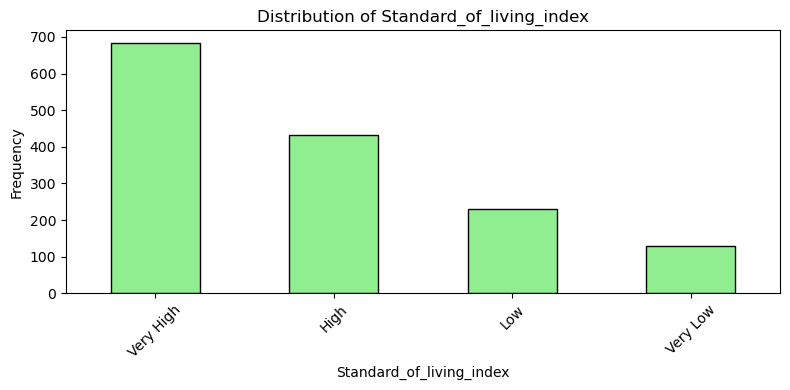

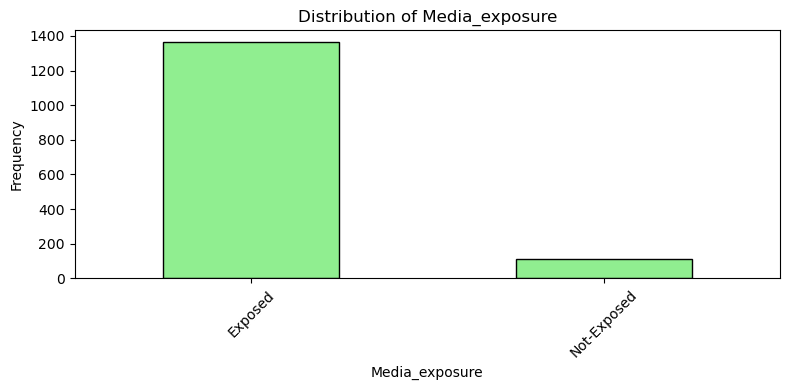

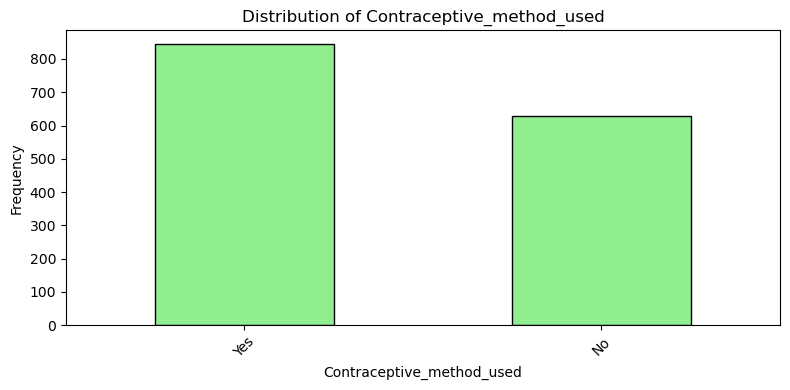

In [15]:
import matplotlib.pyplot as plt

# Correct column names
df2.columns = ['Wife_age', 'Wife_education', 'Husband_education',
               'No_of_children_born', 'Wife_religion', 'Wife_Working',
               'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
               'Contraceptive_method_used']

# Univariate Analysis for Numerical Variables
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(df2['Wife_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Wife Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df2['No_of_children_born'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Number of Children Born')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Univariate Analysis for Categorical Variables
categorical_columns = ['Wife_education', 'Wife_religion', 'Wife_Working', 
                       'Husband_education', 'Husband_Occupation', 
                       'Standard_of_living_index', 'Media_exposure', 
                       'Contraceptive_method_used']

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    df2[column].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\sakth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


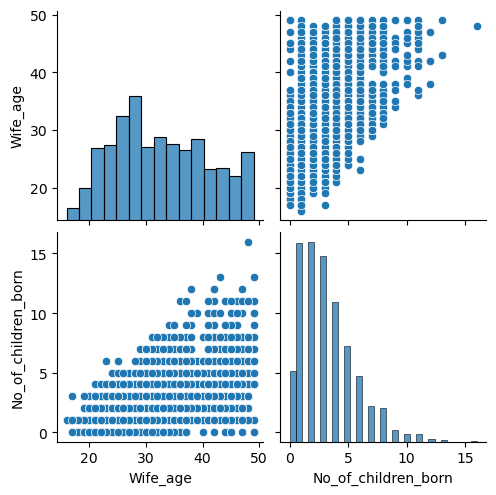

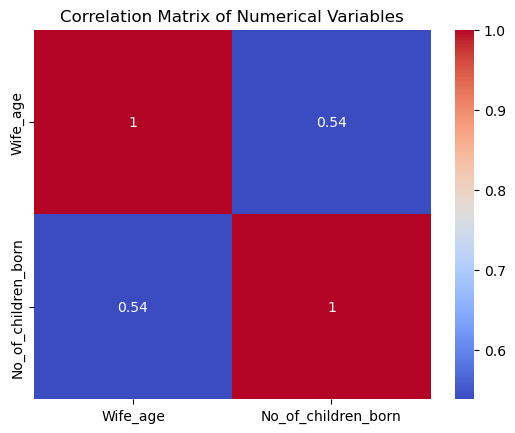

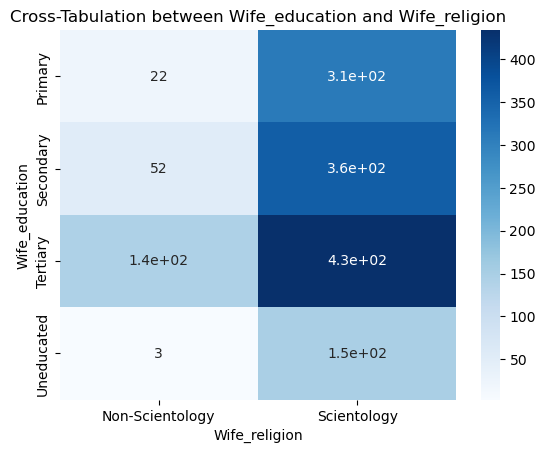

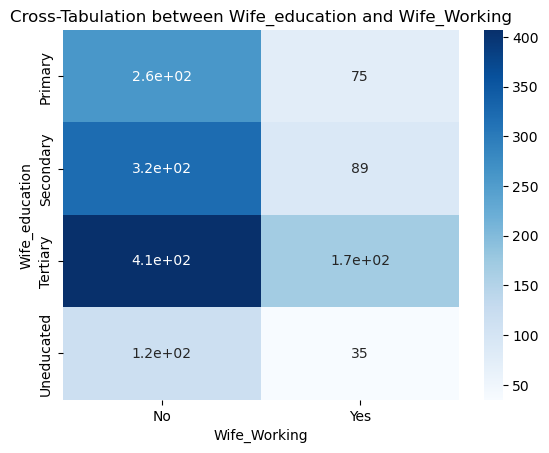

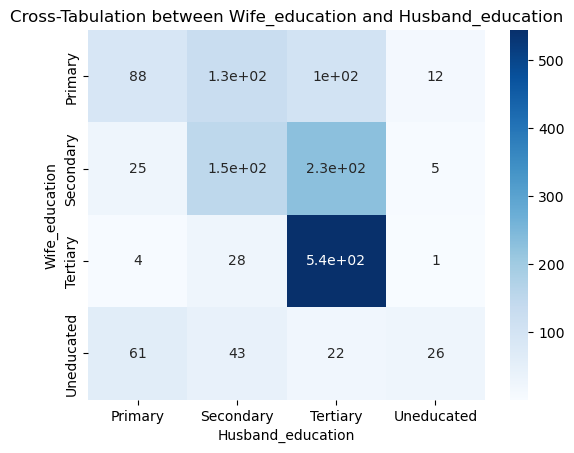

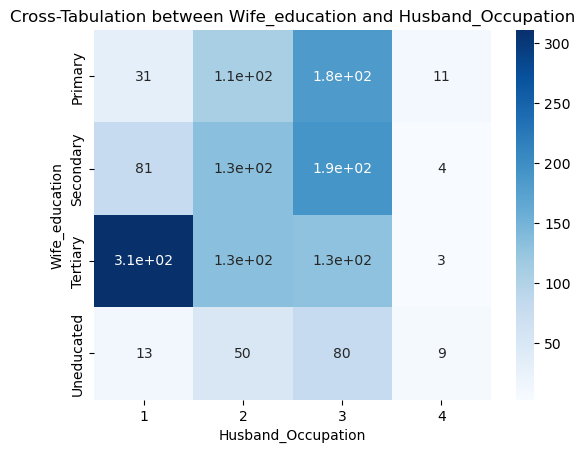

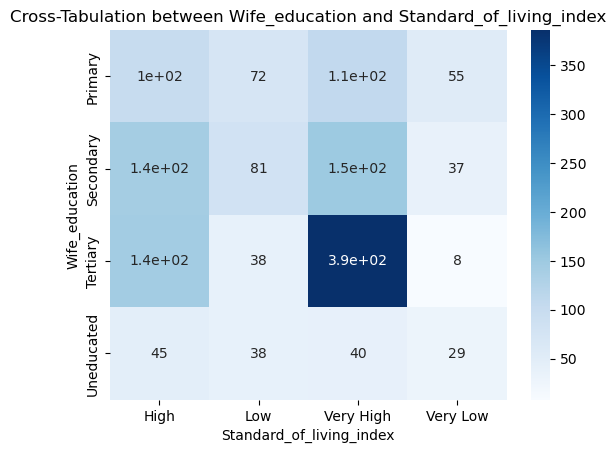

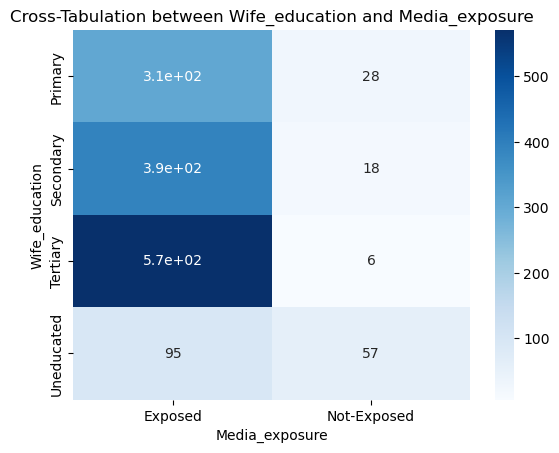

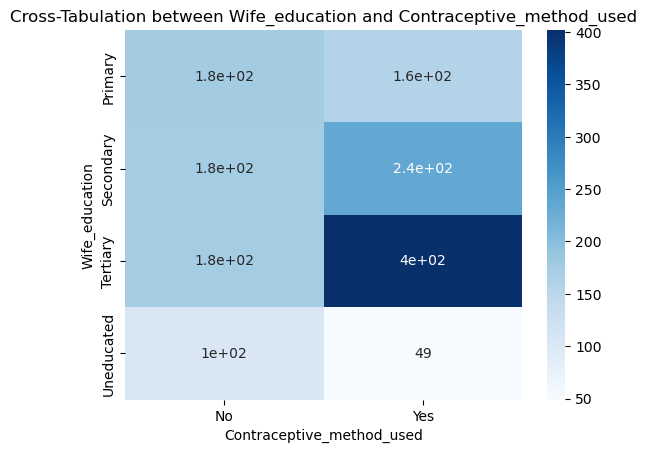

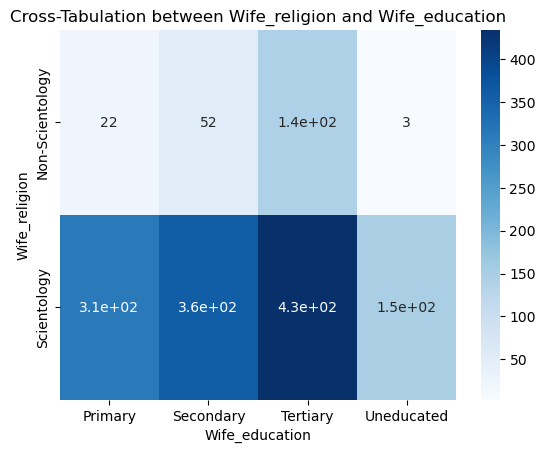

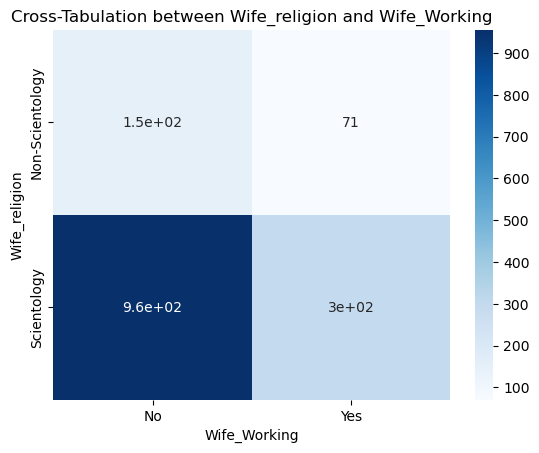

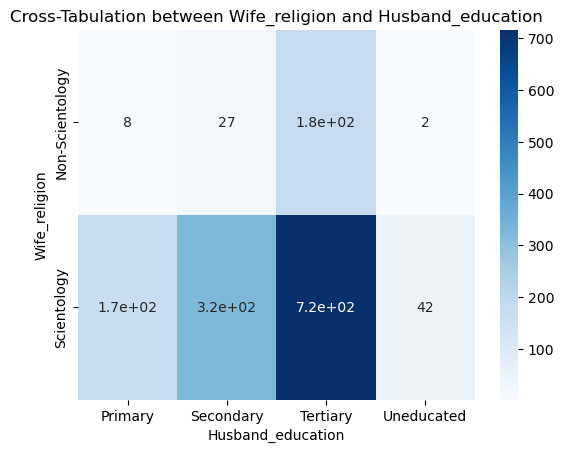

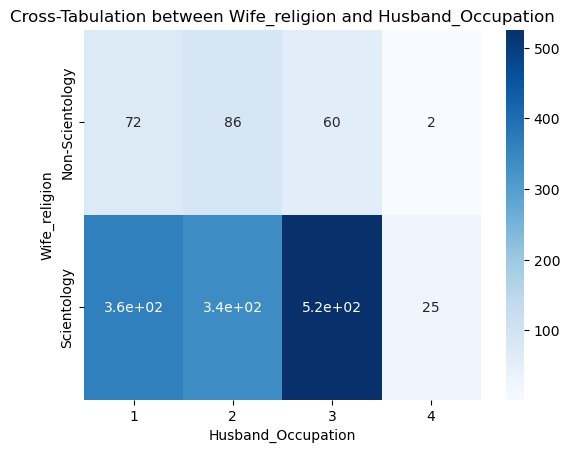

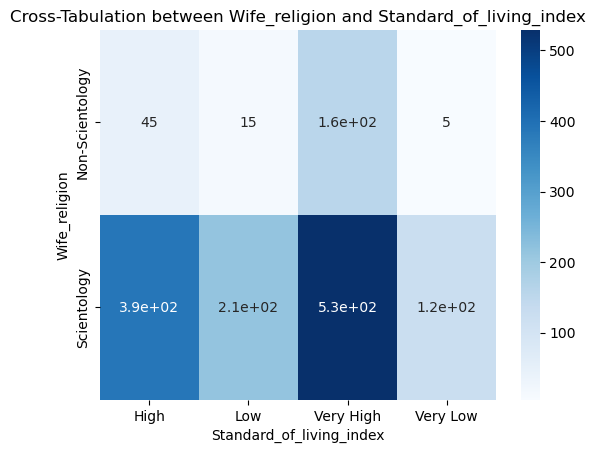

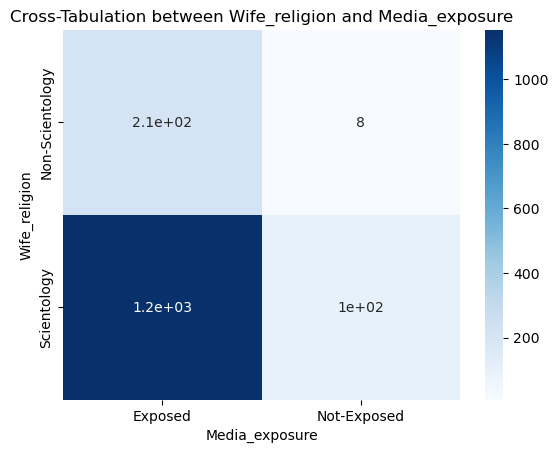

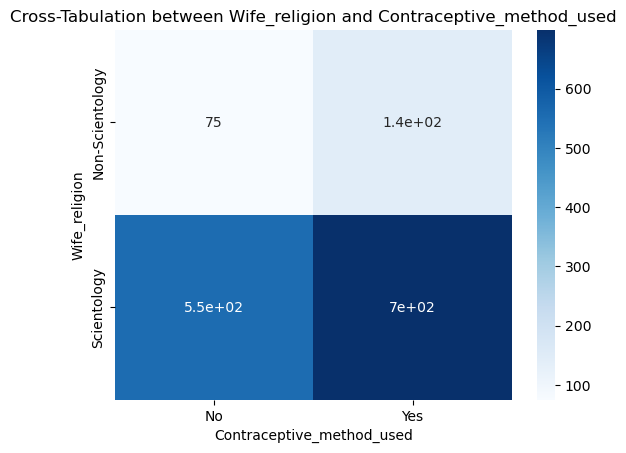

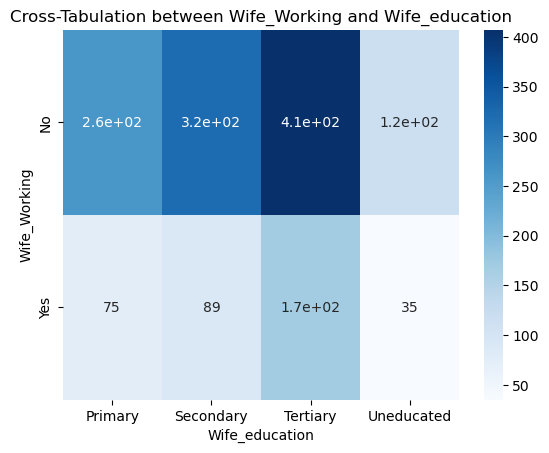

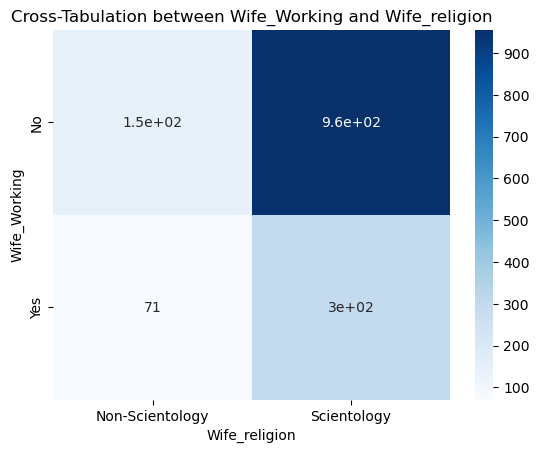

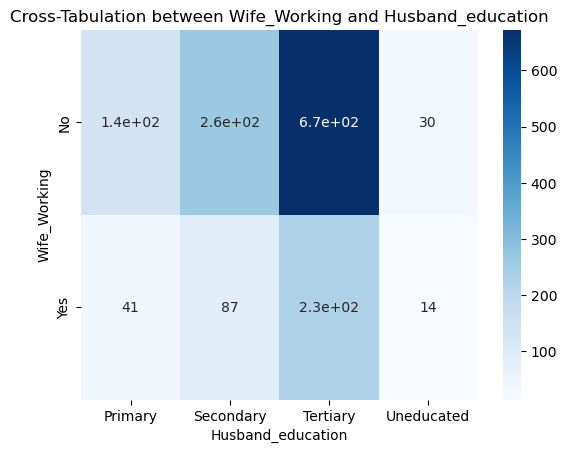

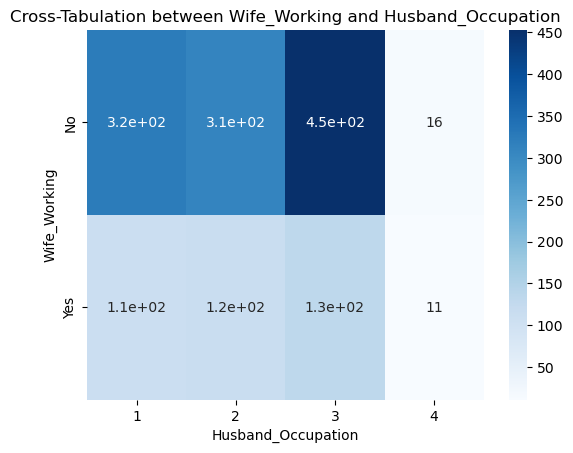

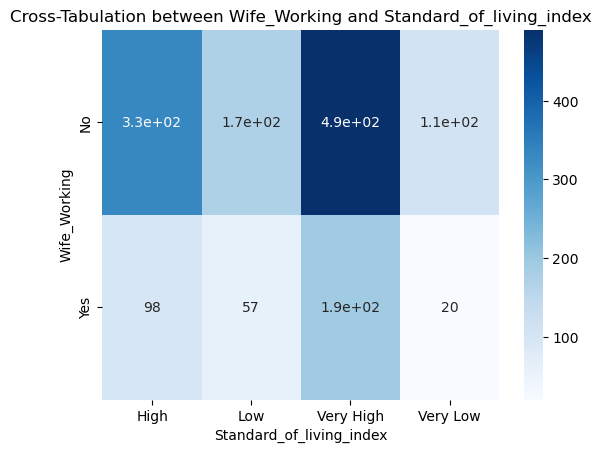

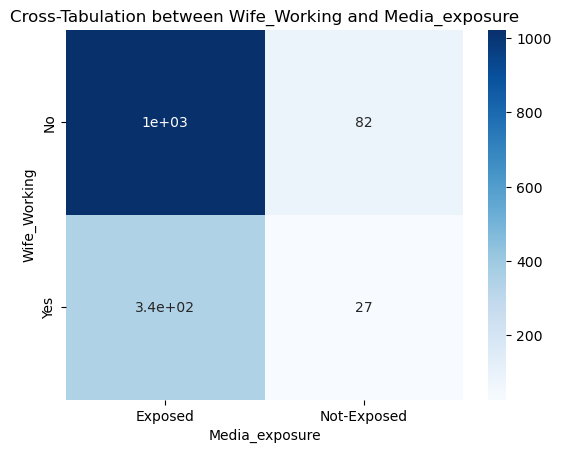

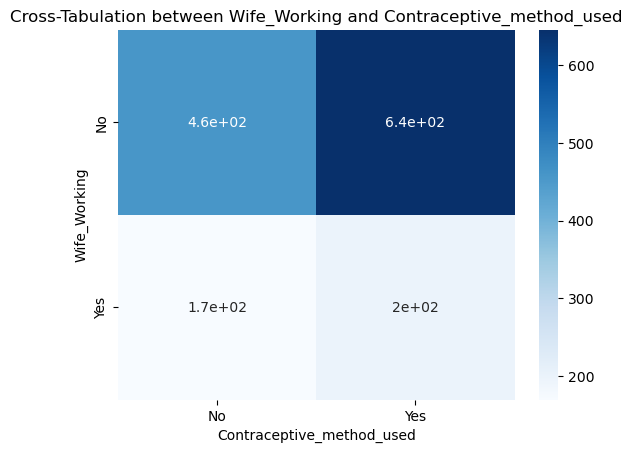

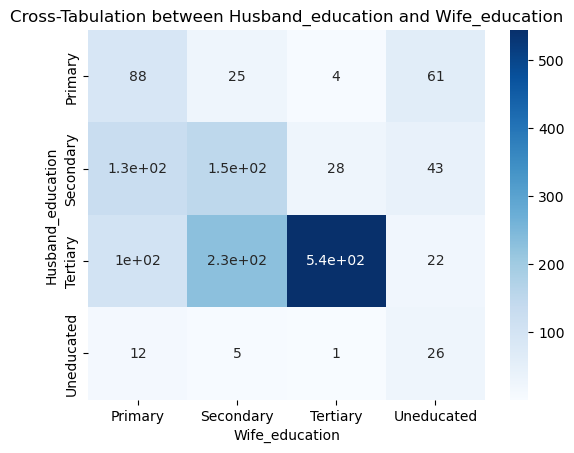

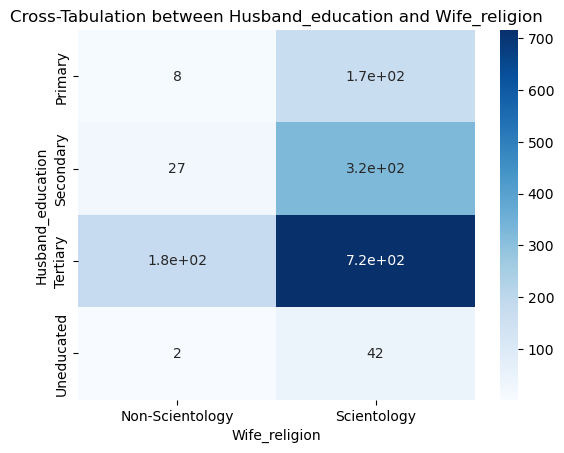

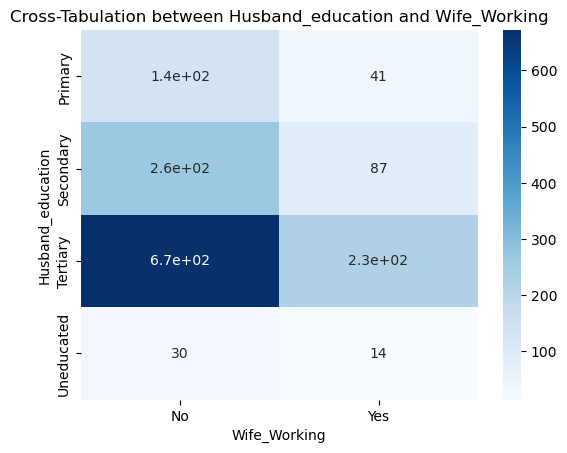

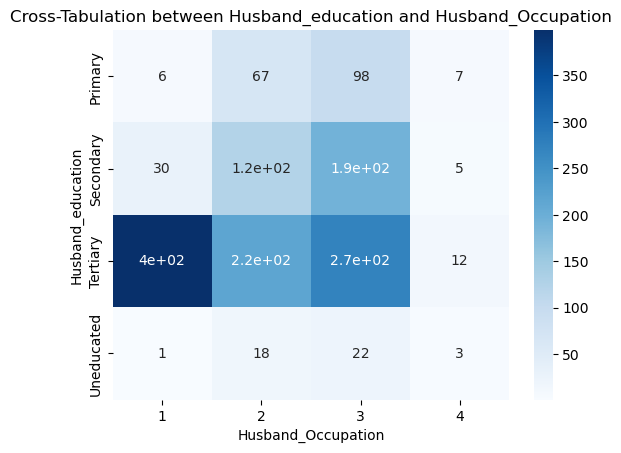

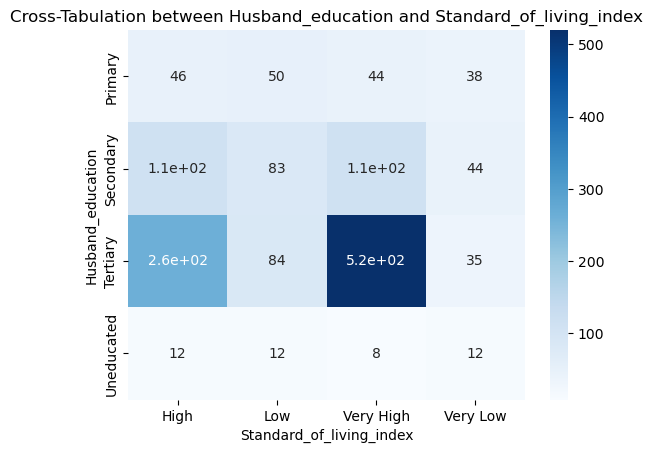

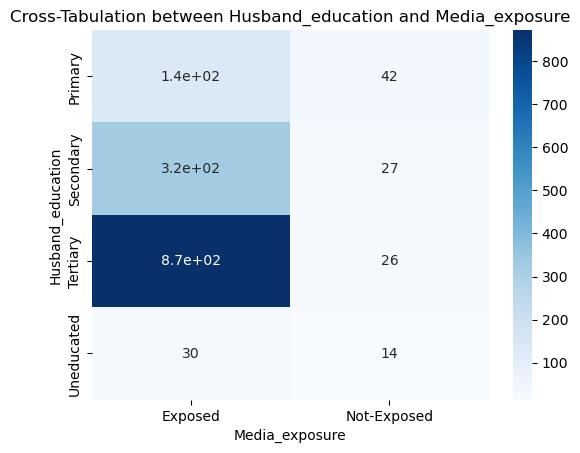

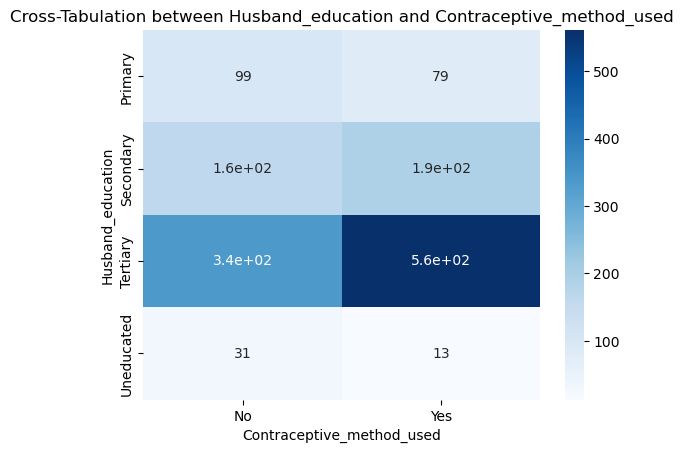

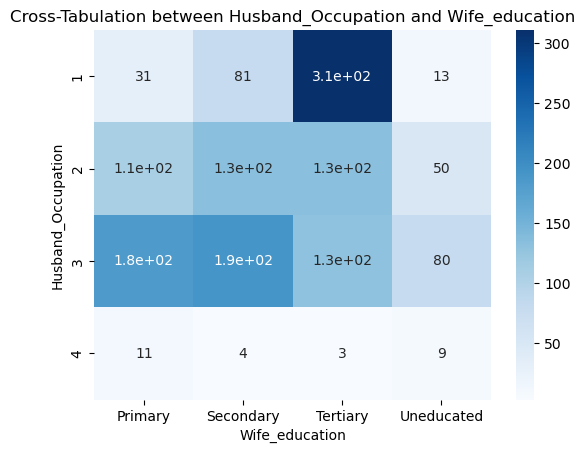

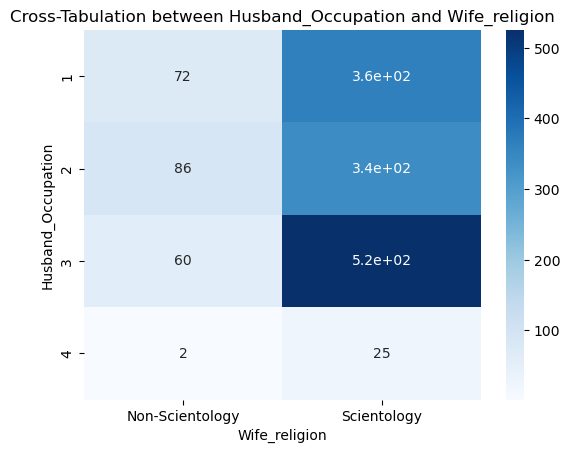

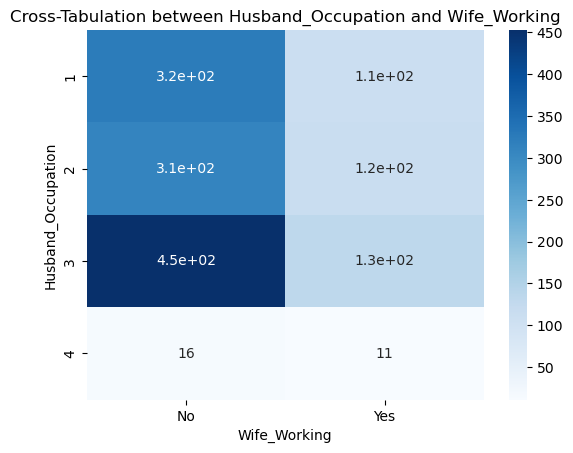

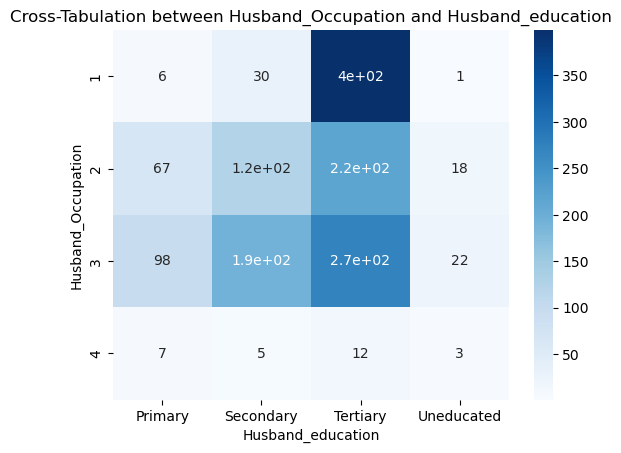

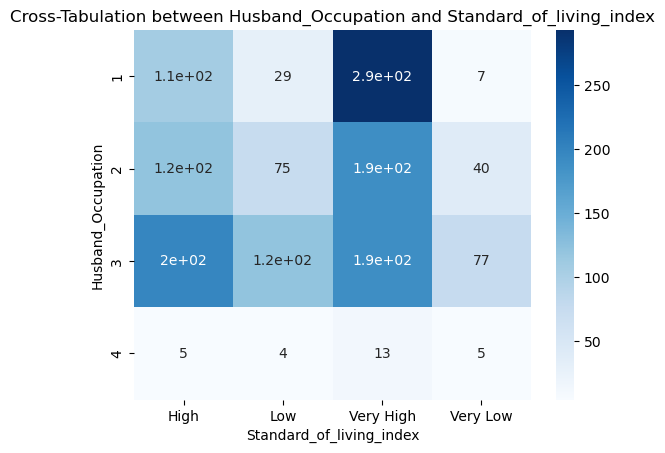

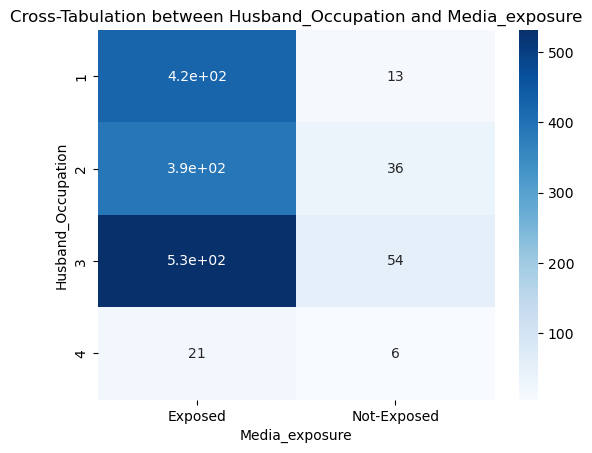

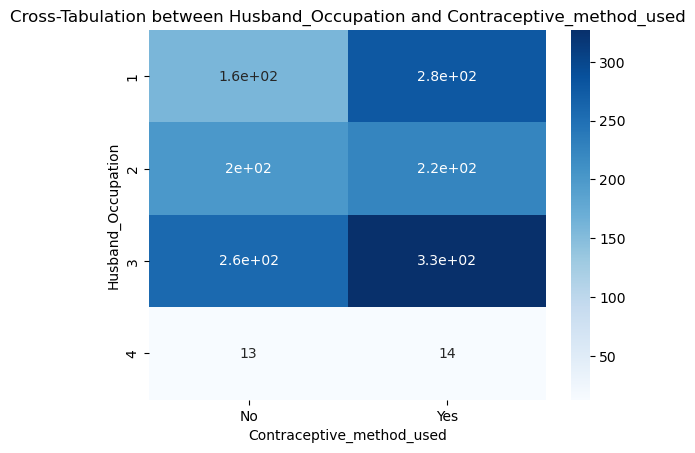

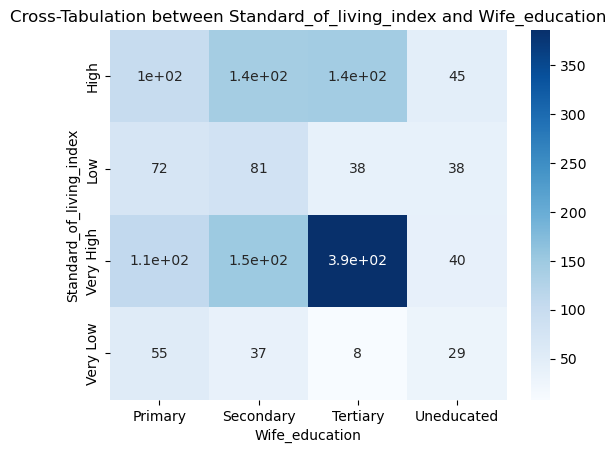

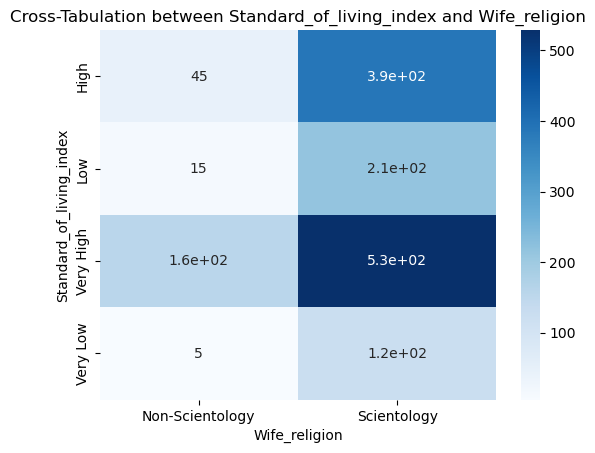

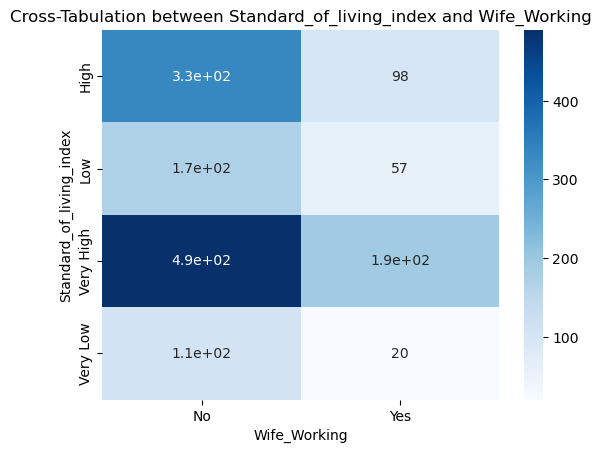

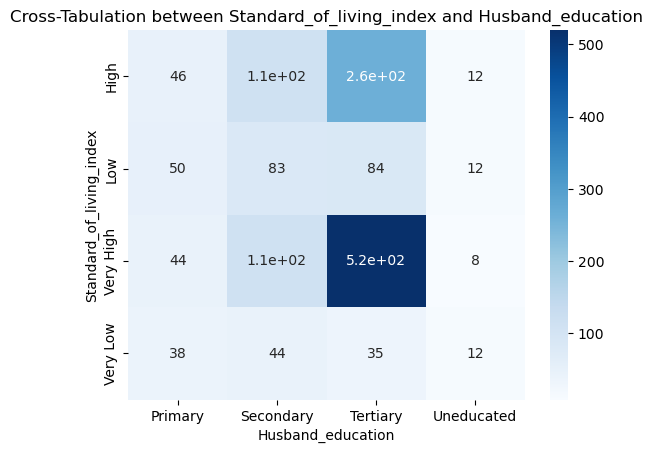

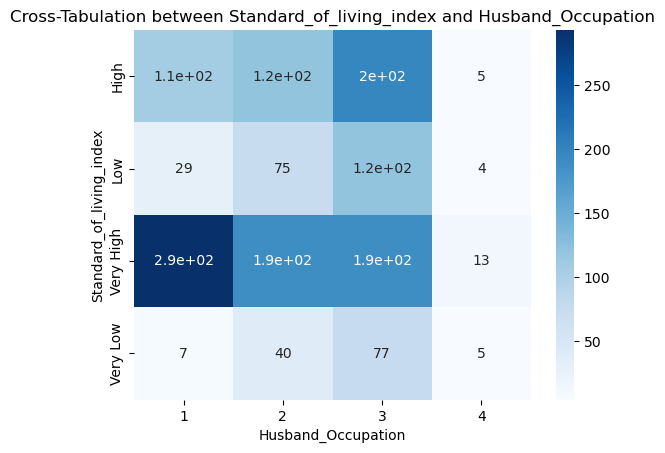

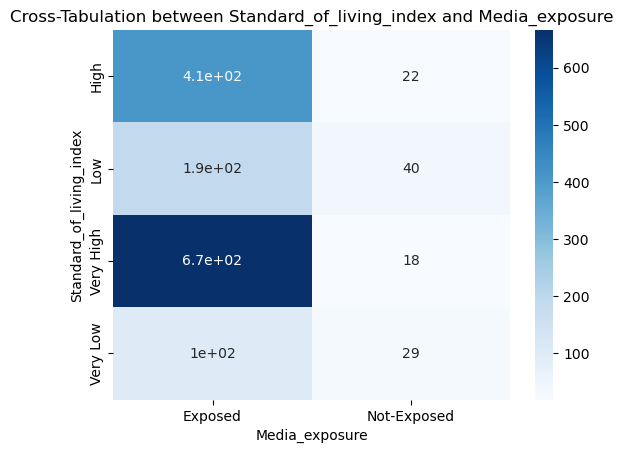

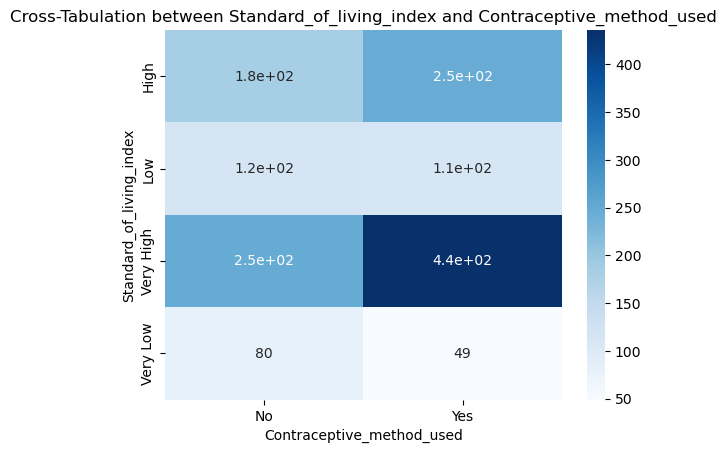

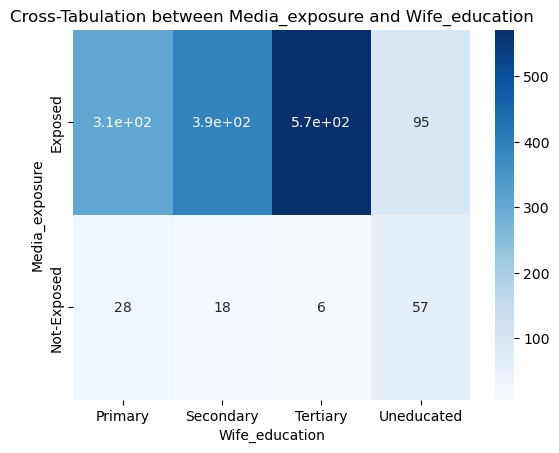

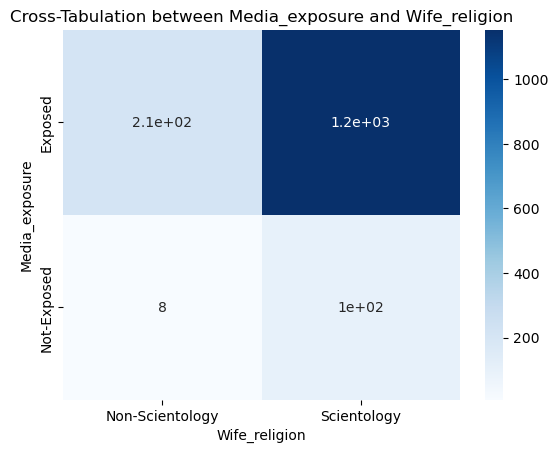

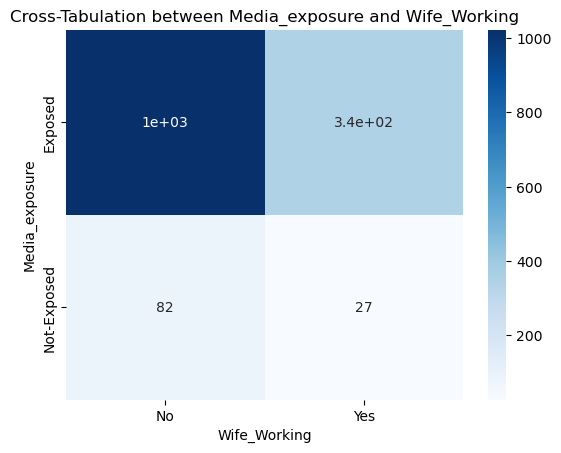

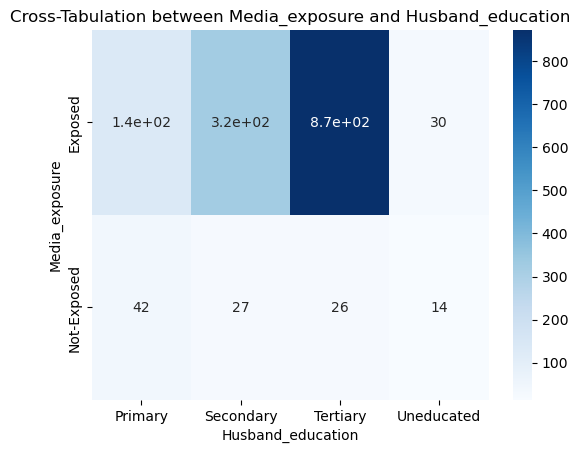

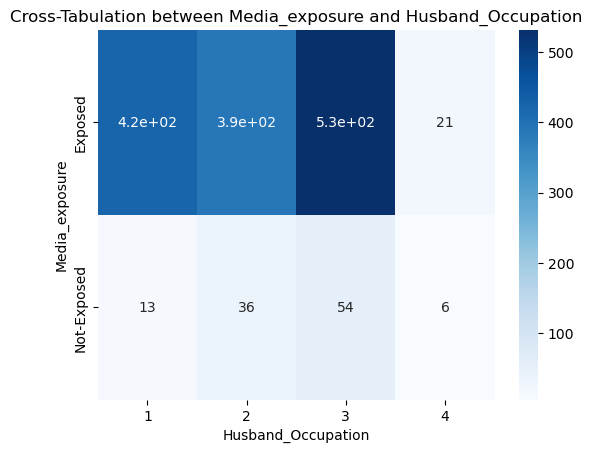

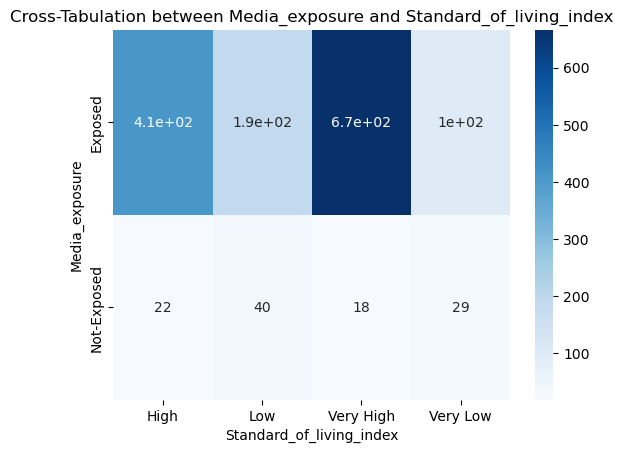

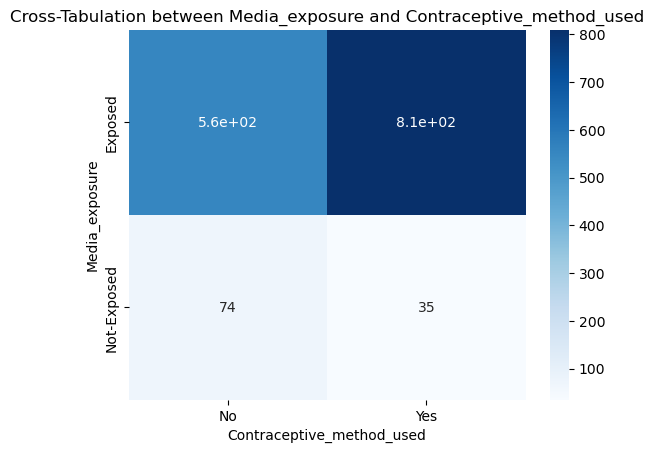

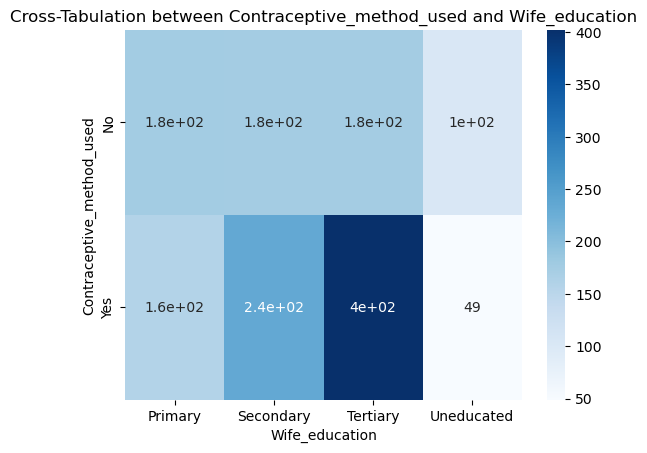

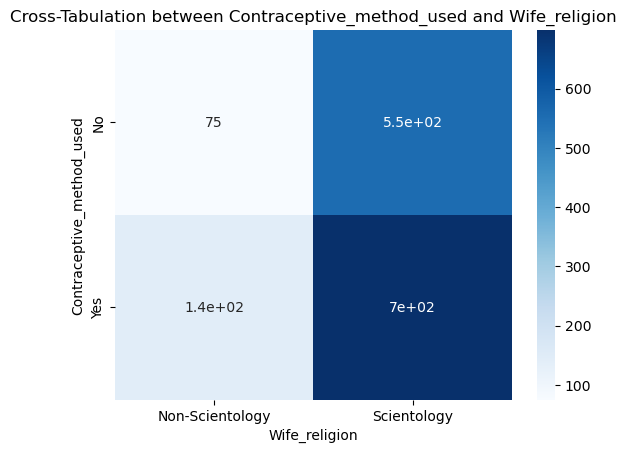

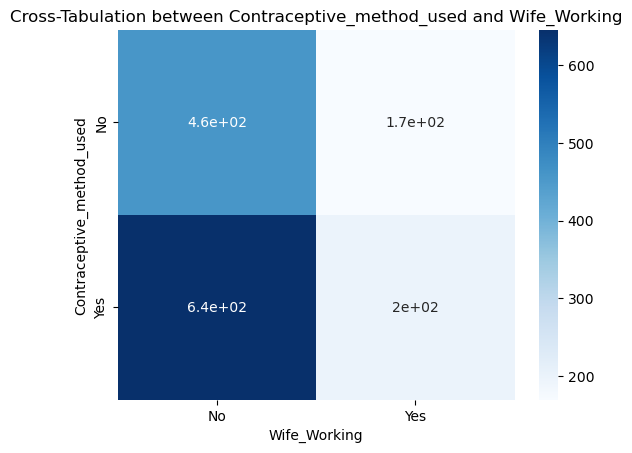

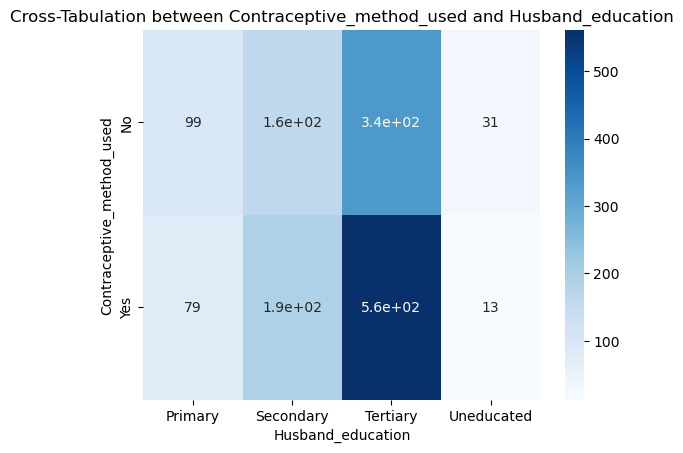

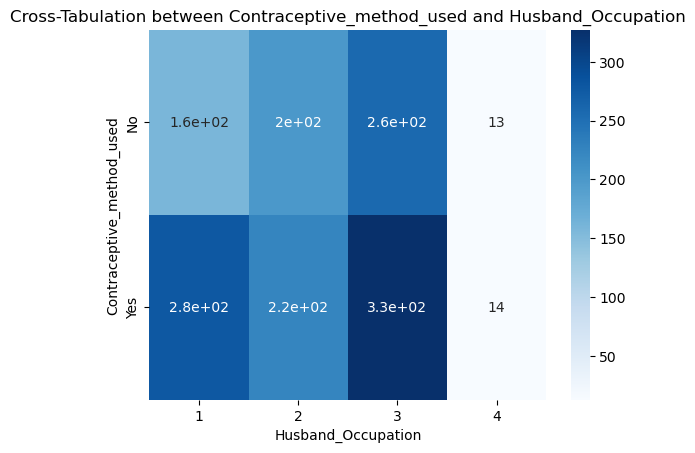

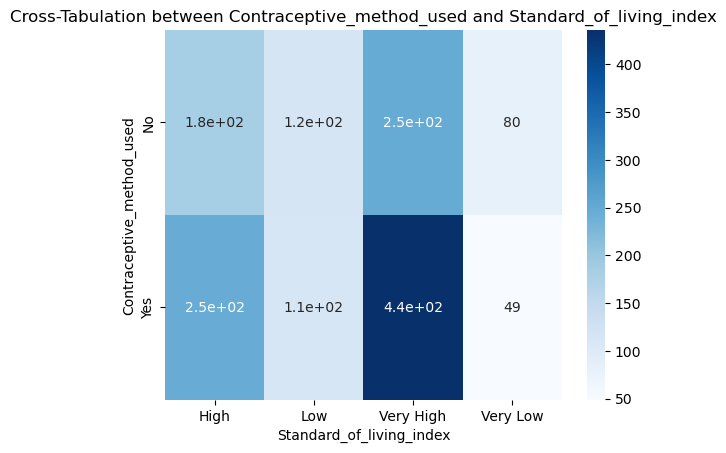

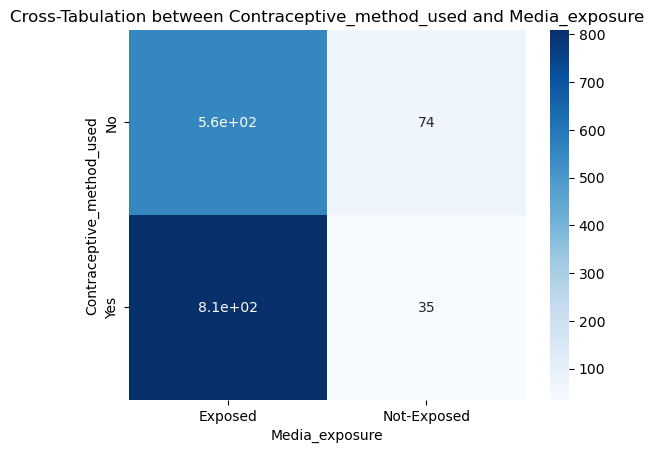

In [14]:
import seaborn as sns

# Multivariate Analysis for Numerical Variables
sns.pairplot(df2[['Wife_age', 'No_of_children_born']])
plt.show()

# Correlation Matrix
correlation_matrix = df2[['Wife_age', 'No_of_children_born']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Multivariate Analysis for Categorical Variables
# Cross-Tabulation
for column1 in categorical_columns:
    for column2 in categorical_columns:
        if column1 != column2:
            cross_tab = pd.crosstab(df2[column1], df2[column2])
            if cross_tab.shape[0] > 1 and cross_tab.shape[1] > 1:  # Avoid empty or single-valued cross-tabulations
                sns.heatmap(cross_tab, annot=True, cmap='Blues')
                plt.title(f'Cross-Tabulation between {column1} and {column2}')
                plt.xlabel(column2)
                plt.ylabel(column1)
                plt.show()


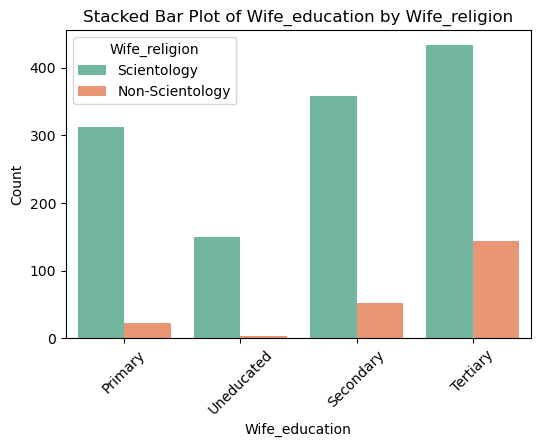

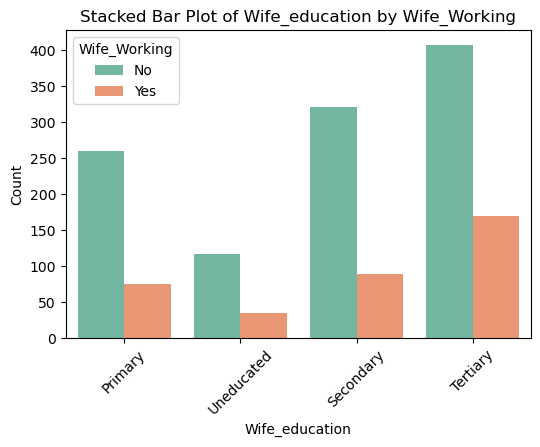

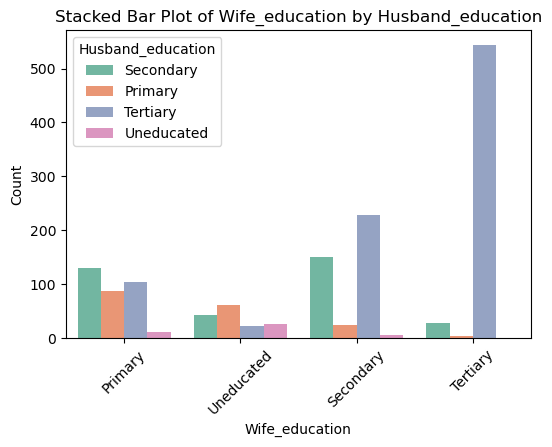

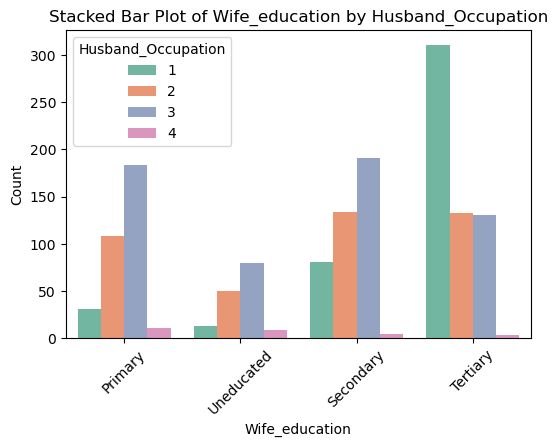

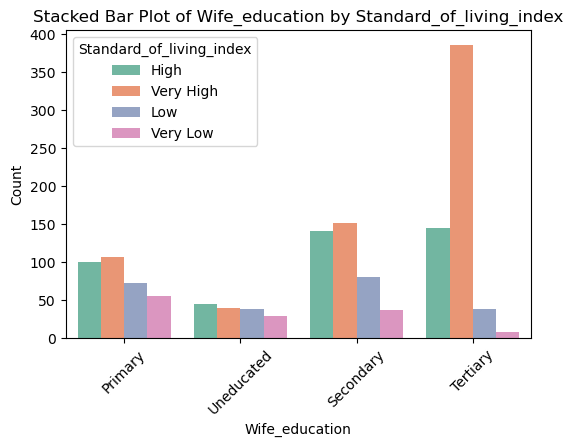

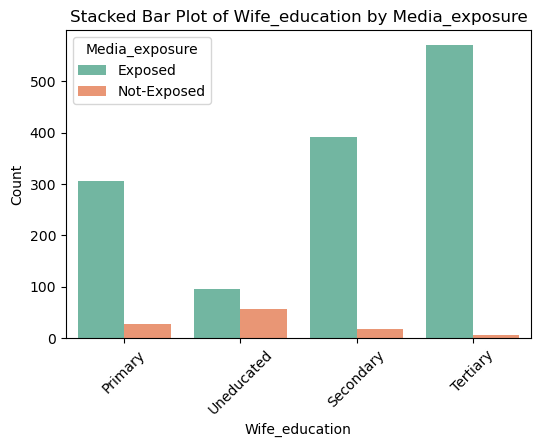

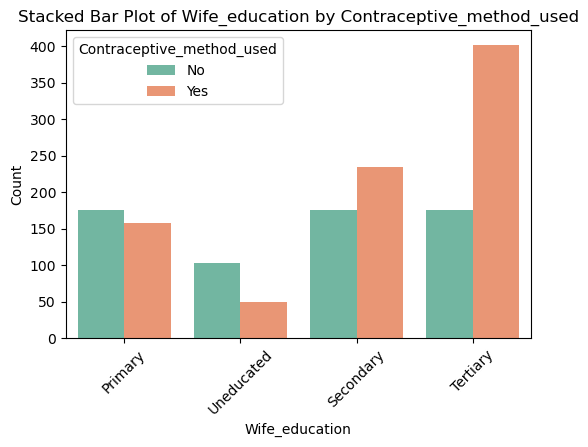

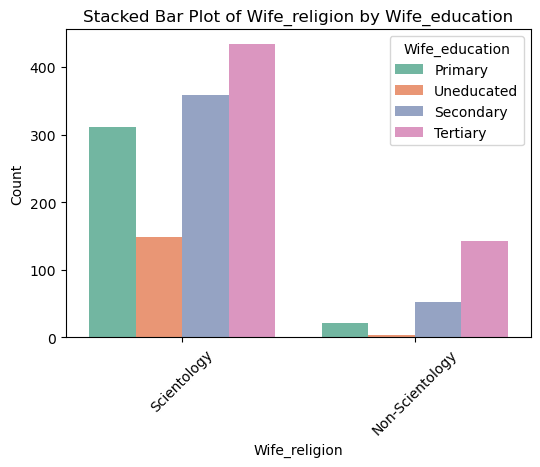

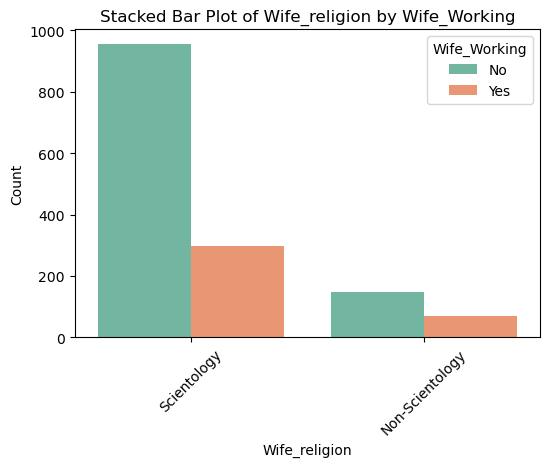

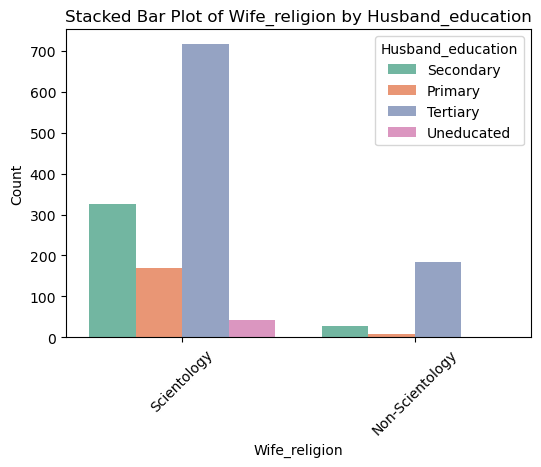

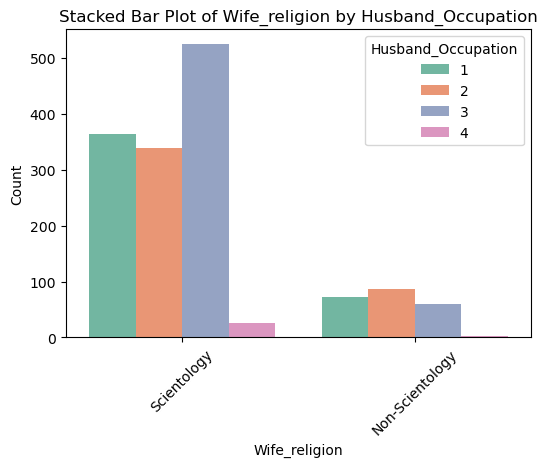

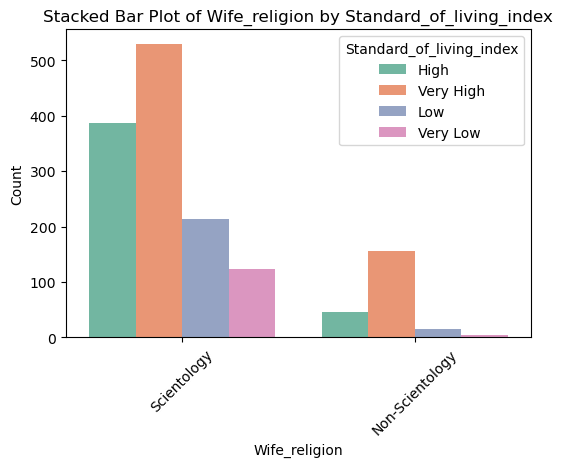

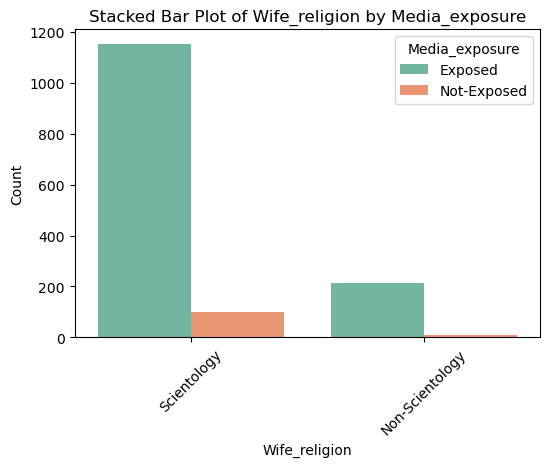

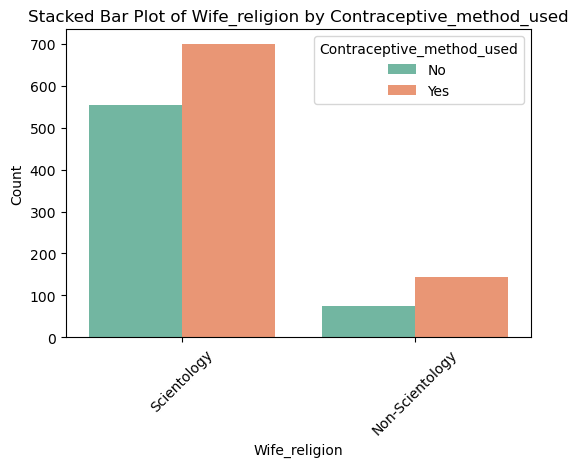

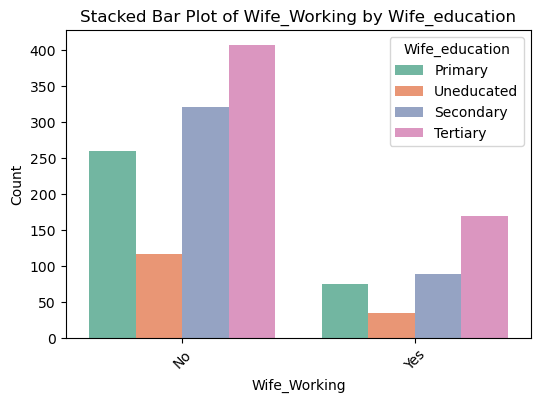

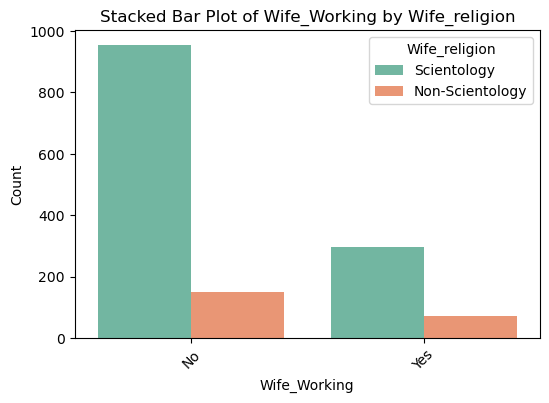

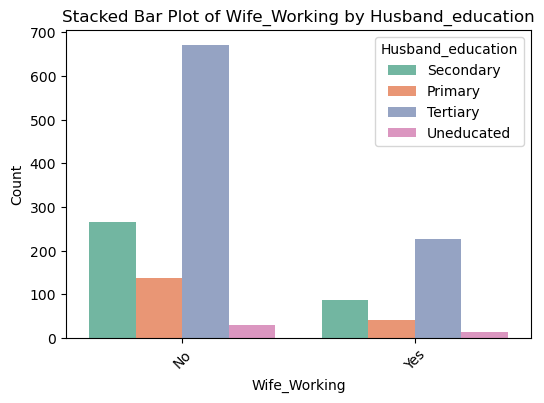

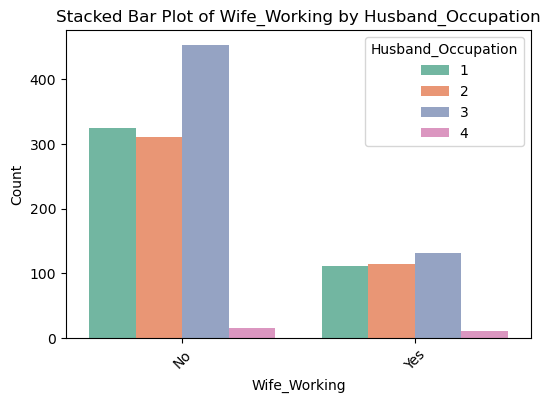

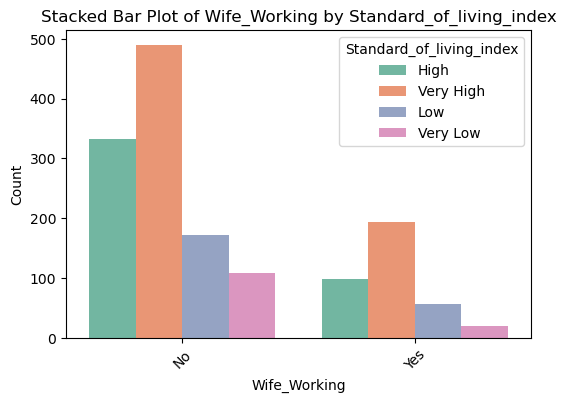

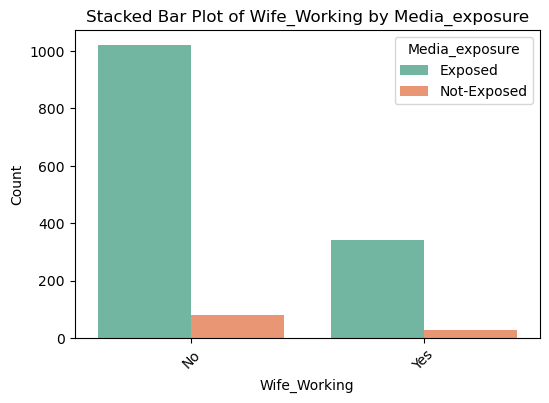

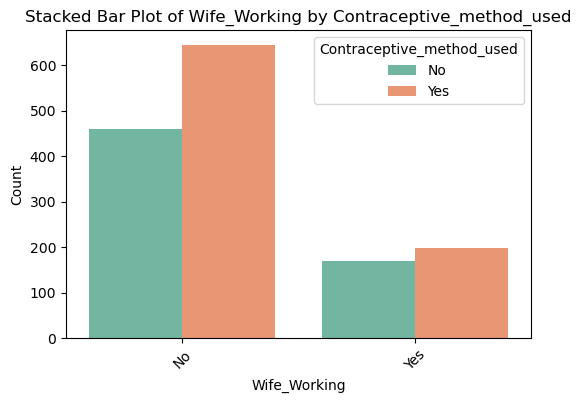

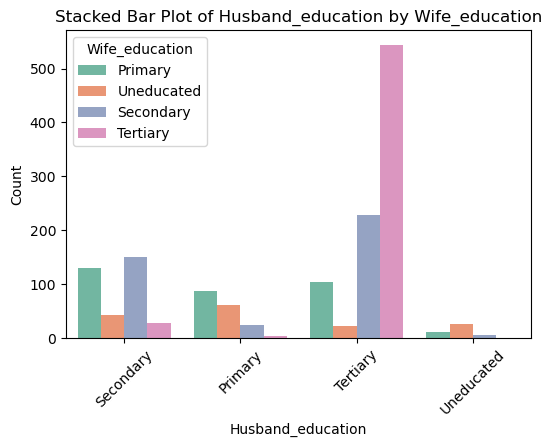

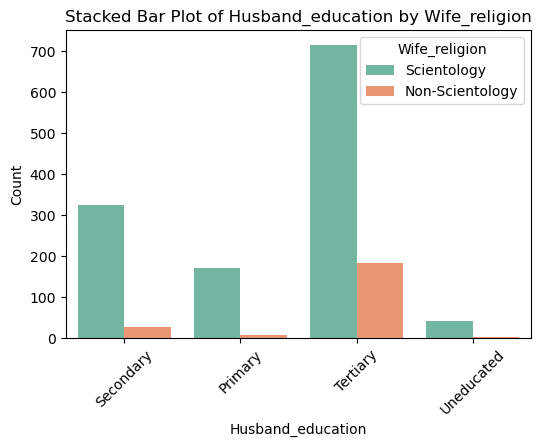

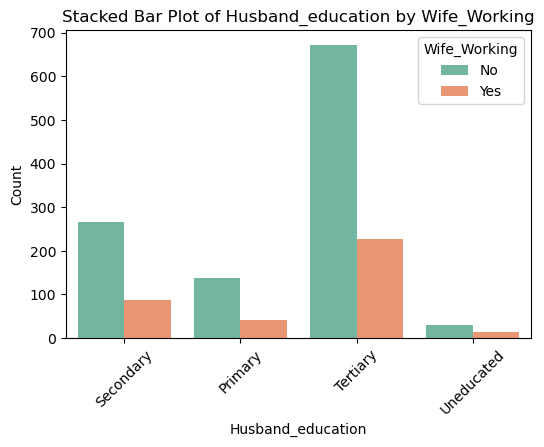

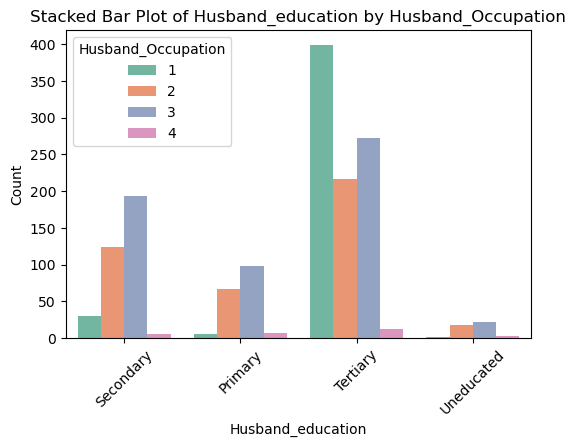

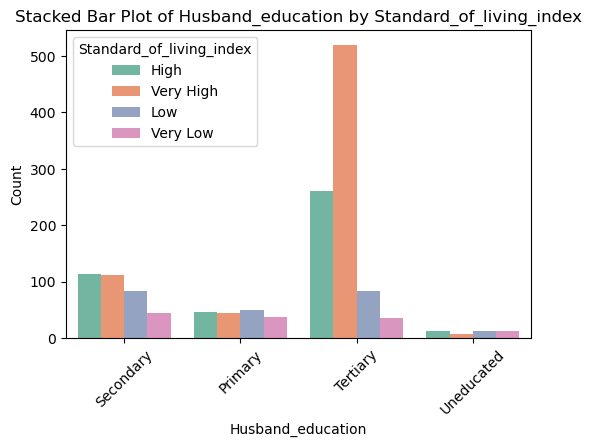

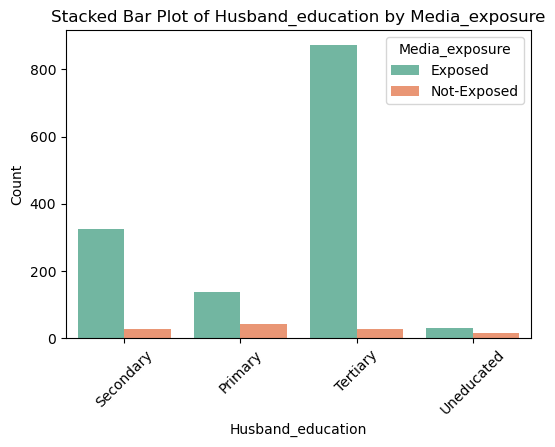

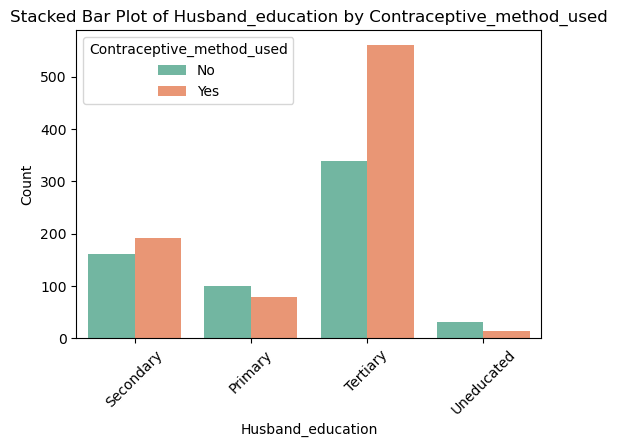

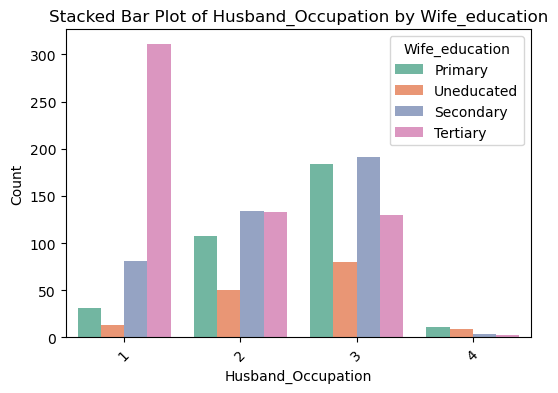

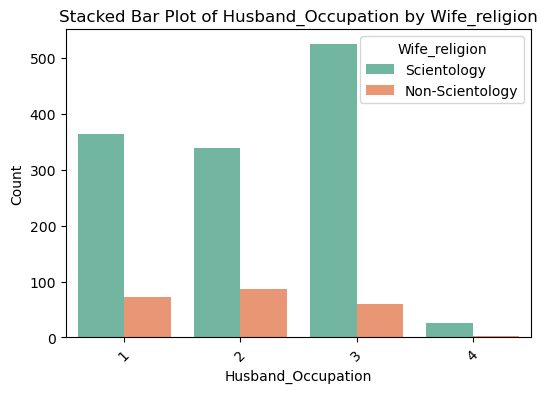

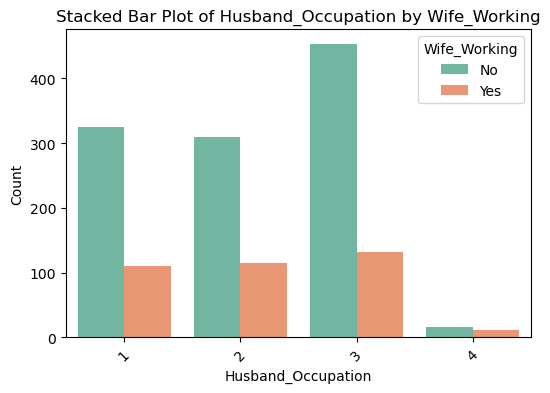

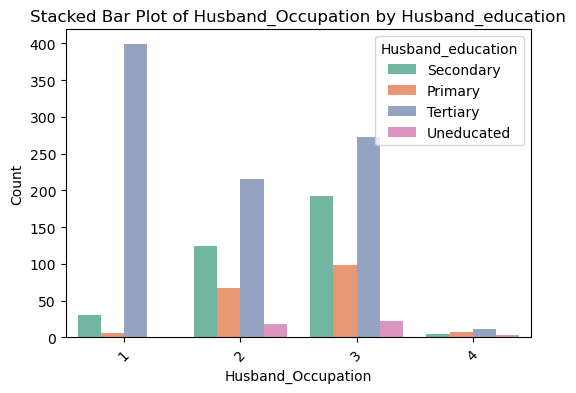

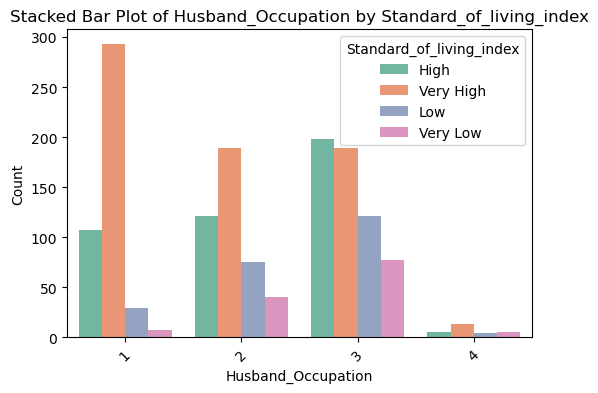

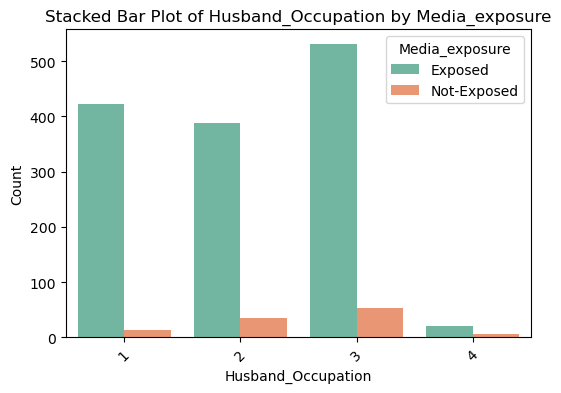

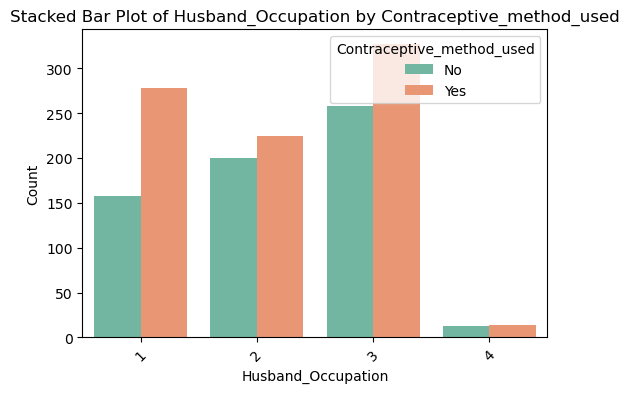

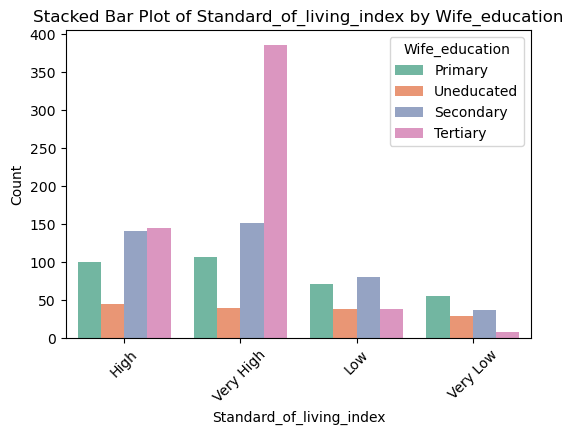

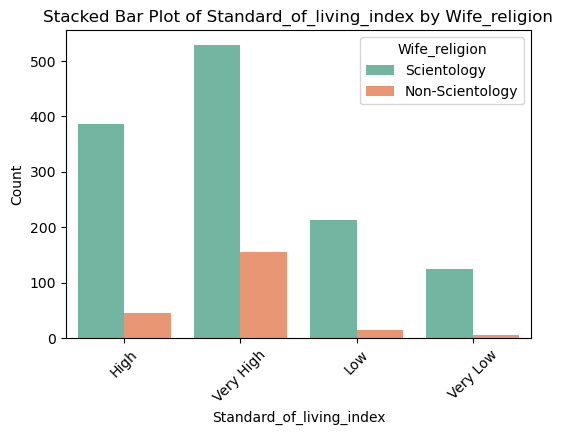

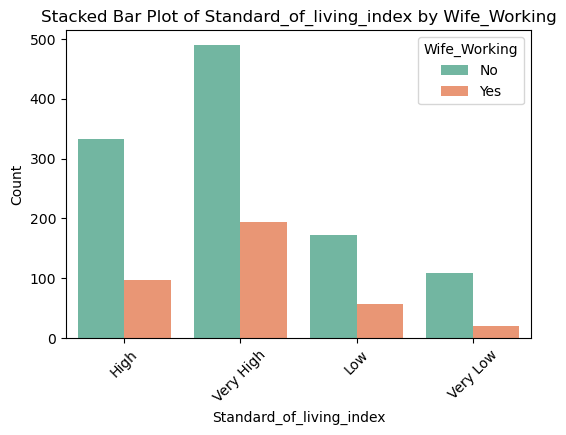

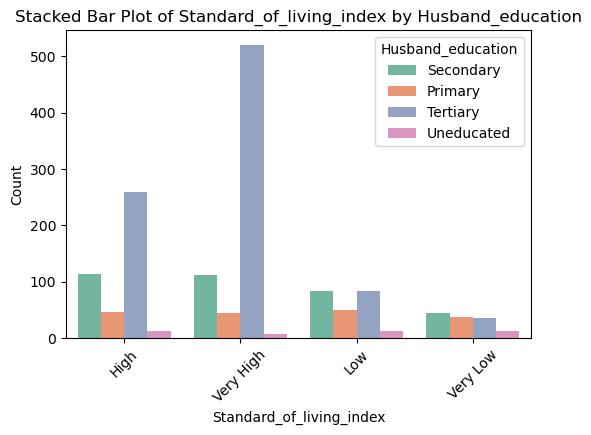

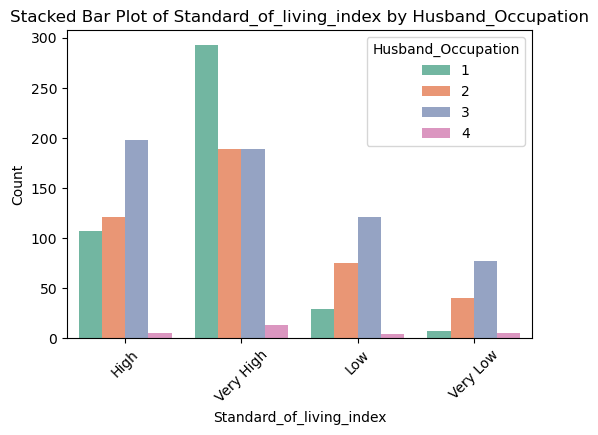

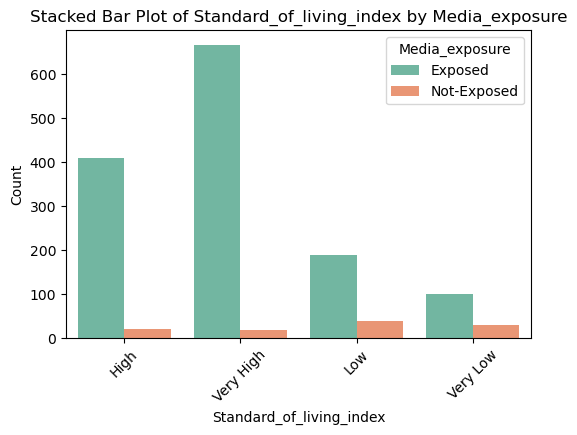

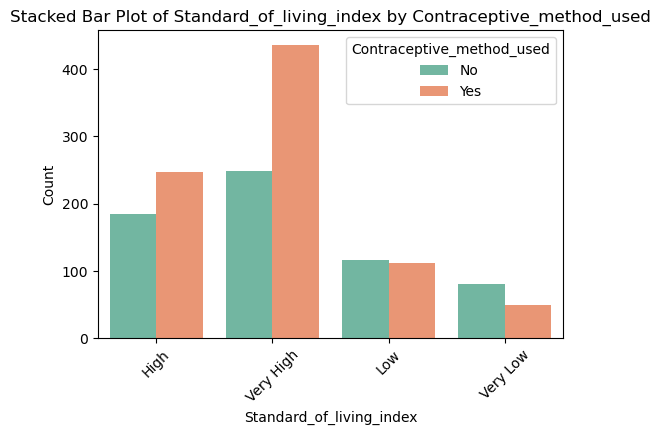

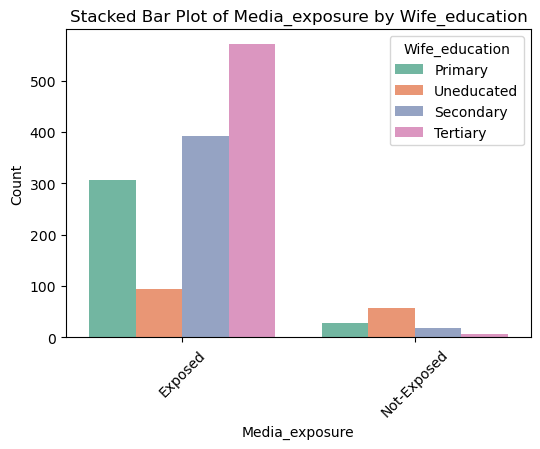

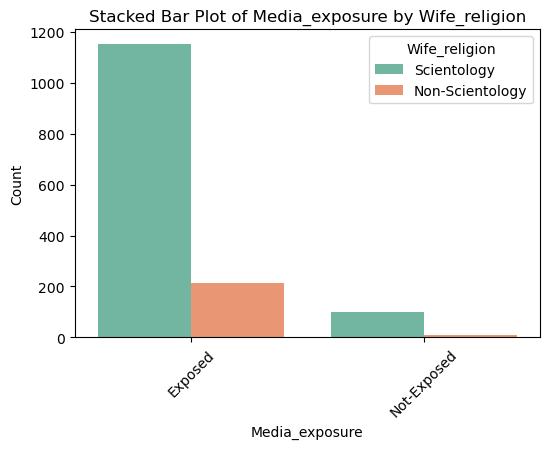

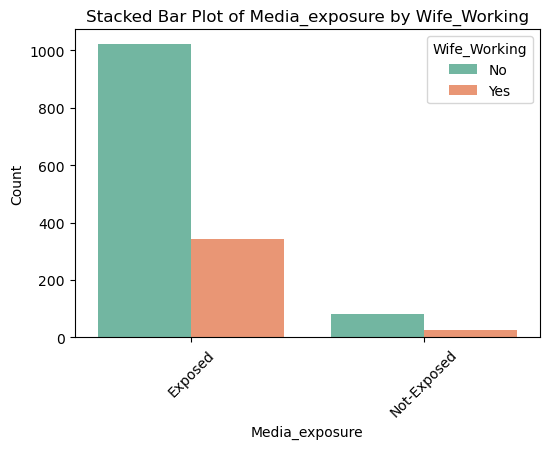

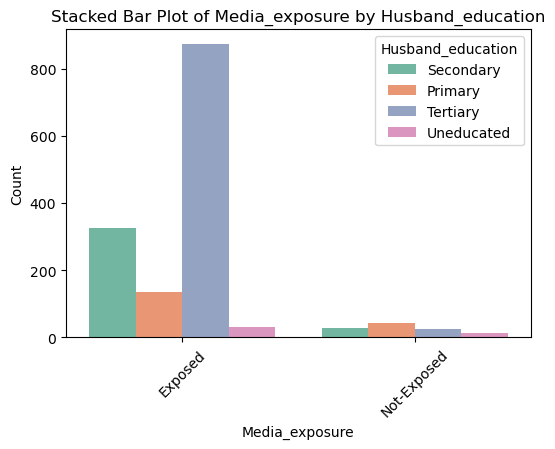

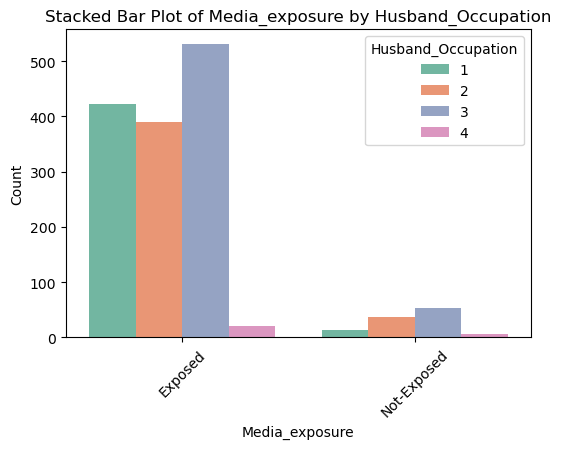

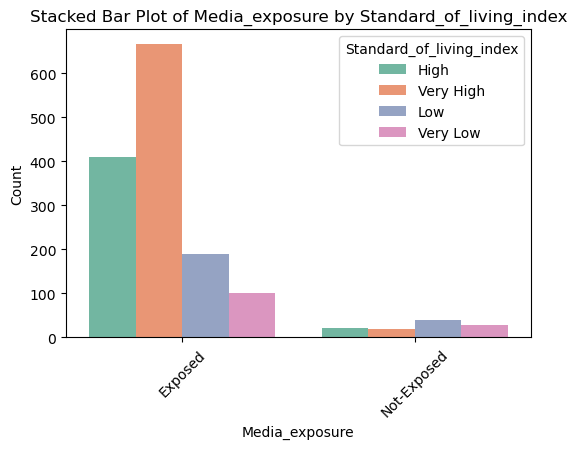

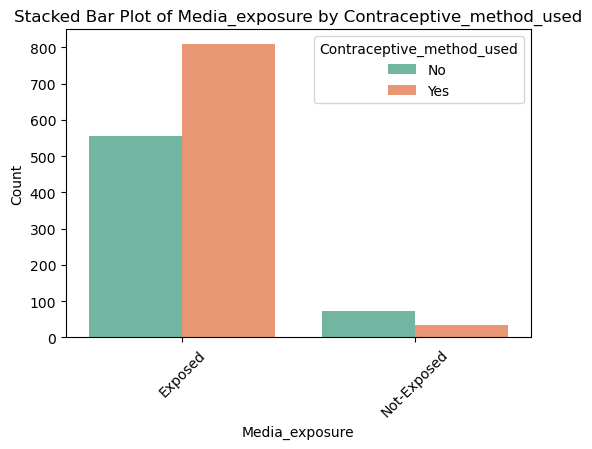

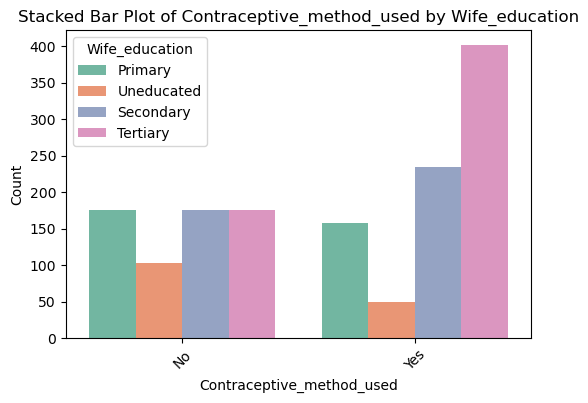

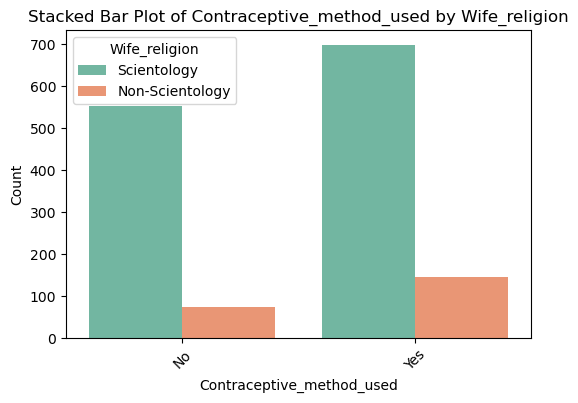

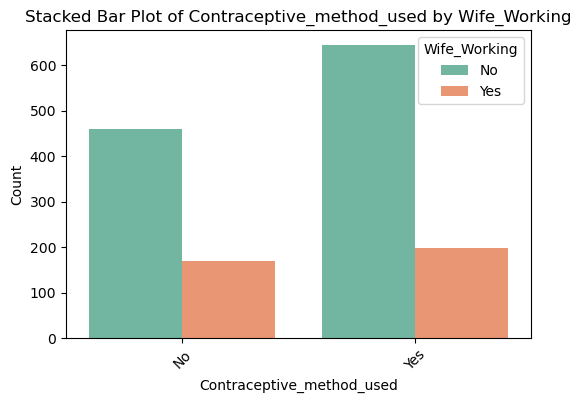

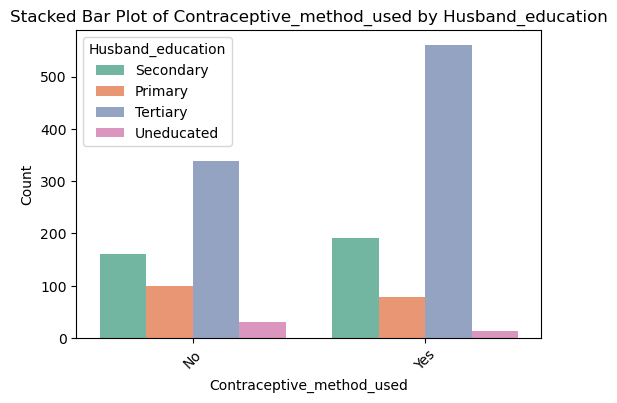

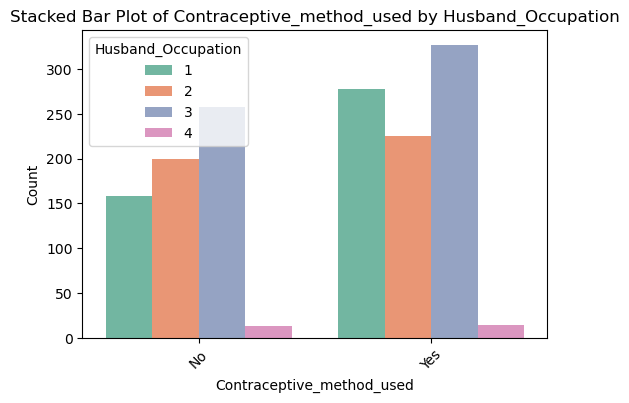

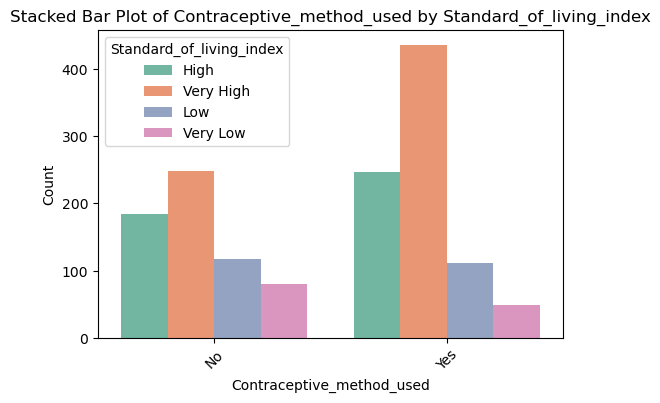

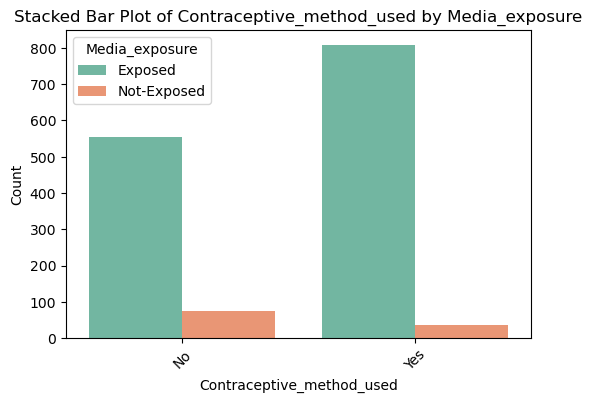

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining categorical variables for multivariate analysis:
categorical_columns = ['Wife_education', 'Wife_religion', 'Wife_Working', 
                       'Husband_education', 'Husband_Occupation', 
                       'Standard_of_living_index', 'Media_exposure', 
                       'Contraceptive_method_used']

# Function to create stacked bar plots:
def stacked_bar_plot(df, x_column, hue_column):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=x_column, hue=hue_column, palette='Set2')
    plt.title(f'Stacked Bar Plot of {x_column} by {hue_column}')
    plt.xlabel(x_column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=hue_column)
    plt.show()
for column1 in categorical_columns:
    for column2 in categorical_columns:
        if column1 != column2:
            stacked_bar_plot(df2, x_column=column1, hue_column=column2)


Individual Variables:
Wife Age:

The dataset contains married females with ages ranging from 16 to 49 years.
The mean age of wives is approximately 32.6 years.
The distribution of wife age appears to be somewhat right-skewed, with a majority of wives falling within the interquartile range of 26 to 39 years.


Number of Children Born:

The number of children born to wives varies widely, ranging from 0 to 16 children.
The mean number of children born is approximately 3.25, with a standard deviation of around 2.37.
The distribution of the number of children born appears to be right-skewed, with a median of 3 children.

Husband Occupation:

Husband occupation levels range from 1 to 4, with 1 indicating the lowest level and 4 indicating the highest level.
The distribution of husband occupation levels appears to be fairly evenly spread across the four levels.

Wife Age and Number of Children Born:

There may be a relationship between wife age and the number of children born, as older wives might have had more time to have children.

Wife Age and Husband Occupation:
There might be a potential relationship between wife age and husband occupation level, as older husbands may have had more time to establish their careers.

Number of Children Born and Husband Occupation:

There could be a relationship between the number of children born and husband occupation level, as higher occupation levels might be associated with greater resources and family planning opportunities.

In [16]:
# Check for missing values
missing_values = df2.isnull().sum()
print("Missing Values:\n", missing_values)

# Impute missing values
# For numerical columns, impute with median
df2['Wife_age'].fillna(df2['Wife_age'].median(), inplace=True)
df2['No_of_children_born'].fillna(df2['No_of_children_born'].median(), inplace=True)

# For categorical columns, impute with mode
df2['Wife_education'].fillna(df2['Wife_education'].mode()[0], inplace=True)
# Repeat for other categorical columns if necessary

# Validate if missing values have been handled
missing_values_after = df2.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after)


Missing Values:
 Wife_age                     71
Wife_education                0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64
Missing Values After Imputation:
 Wife_age                     0
Wife_education               0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64


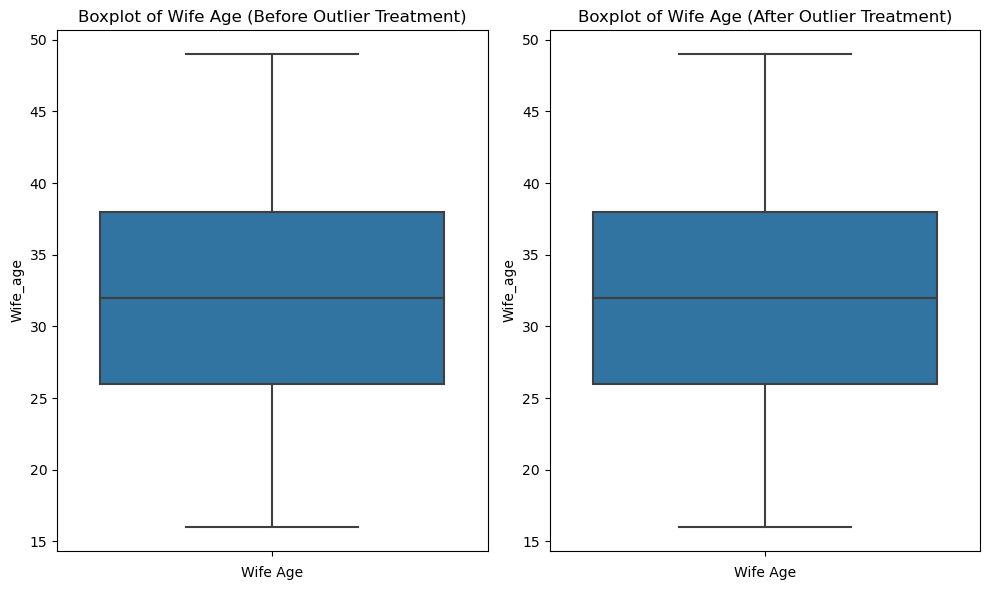

Outliers Before Treatment:
Series([], Name: Wife_age, dtype: float64)
Number of outliers removed: 0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Before Outlier Treatment
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df2['Wife_age'])
plt.title('Boxplot of Wife Age (Before Outlier Treatment)')
plt.xlabel('Wife Age')

# Detect outliers using z-score
z_scores = zscore(df2['Wife_age'])
outlier_threshold = 3  # Adjust as needed
outliers = df2['Wife_age'][abs(z_scores) > outlier_threshold]

# After Outlier Treatment
plt.subplot(1, 2, 2)
sns.boxplot(y=df2['Wife_age'].drop(outliers.index))
plt.title('Boxplot of Wife Age (After Outlier Treatment)')
plt.xlabel('Wife Age')

plt.tight_layout()
plt.show()

# Print outliers before treatment
print("Outliers Before Treatment:")
print(outliers)

# Remove outliers
df2 = df2.drop(outliers.index)

# Print number of outliers removed
print("Number of outliers removed:", len(outliers))



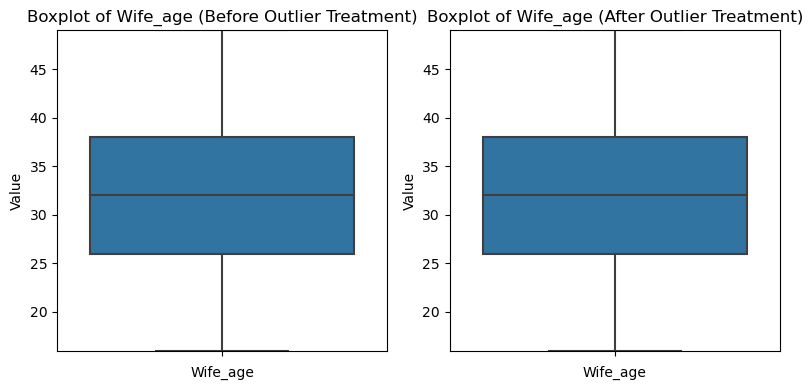

Outliers removed for column 'Wife_age': Before (0), After (0)


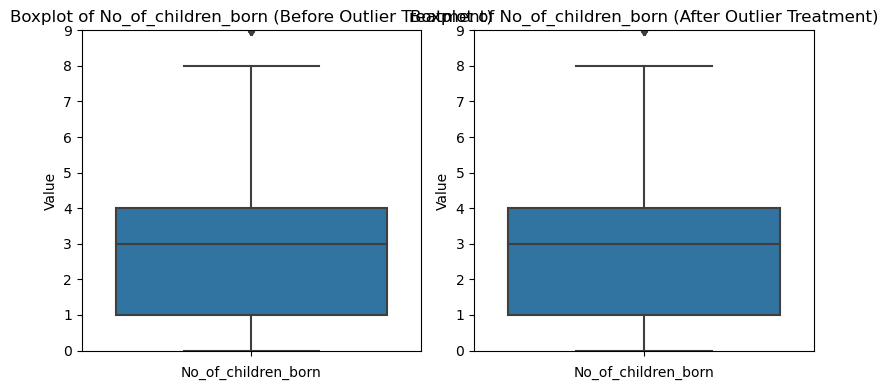

Outliers removed for column 'No_of_children_born': Before (11), After (0)


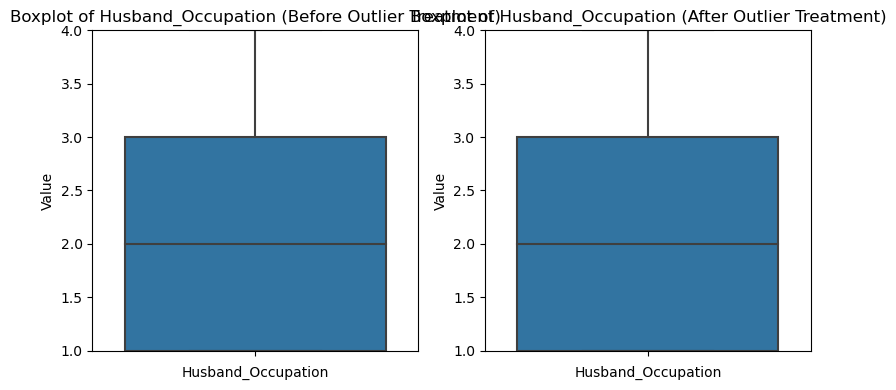

Outliers removed for column 'Husband_Occupation': Before (0), After (0)
Outlier treatment completed.


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Defining outlier detection threshold:
outlier_threshold = 3  

# Function to plot box plots before and after outlier treatment:
def plot_outlier_boxplots(df, column, outliers_before, outliers_after):
    plt.figure(figsize=(8, 4))
# Before Outlier Treatment:
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column} (Before Outlier Treatment)')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.ylim(df[column].min(), df[column].max()) 
    
# After Outlier Treatment:
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column} (After Outlier Treatment)')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.ylim(df[column].min(), df[column].max()) 
    
    plt.tight_layout()
    plt.show()
    print(f"Outliers removed for column '{column}': Before ({outliers_before}), After ({outliers_after})")

# Loop through numeric columns
for column in df2.select_dtypes(include=['float64', 'int64']).columns:
# Calculating z-scores for each numeric column:
    z_scores = zscore(df2[column])
    outliers_before = df2[column][abs(z_scores) > outlier_threshold]
# Removing outliers:
    df2 = df2.drop(outliers_before.index)
    plot_outlier_boxplots(df2, column, len(outliers_before), 0)

print("Outlier treatment completed.")


In [26]:
from sklearn.preprocessing import StandardScaler

# Selecting only the numerical columns for scaling:
numerical_columns = df2.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

# Printing the scaled dataset:
df2.head()


Wife_age Wife_education Husband_education  No_of_children_born  \
0 -1.047322        Primary         Secondary            -0.044893   
2  1.335094        Primary         Secondary             1.875870   
3  1.209704      Secondary           Primary             2.836252   
4  0.457362      Secondary         Secondary             2.356061   
5 -1.674273       Tertiary          Tertiary            -1.485466   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No           -0.161027                     High   
2   Scientology           No            0.995801                Very High   
3   Scientology           No            0.995801                     High   
4   Scientology           No            0.995801                      Low   
5   Scientology           No            0.995801                     High   

  Media_exposure Contraceptive_method_used  
0        Exposed                        No  
2        Exposed                        No  
3        Exposed                        No  
4        Exposed                        No  
5        Exposed                        No

In [22]:
import pandas as pd



# Selecting only the categorical columns for encoding:
categorical_columns = df2.select_dtypes(include=['object']).columns

# Performing one-hot encoding:
encoded_df = pd.get_dummies(df2, columns=categorical_columns)





      Wife_age  No_of_children_born  Husband_Occupation  \
0    -1.047322            -0.044893           -0.161027   
2     1.335094             1.875870            0.995801   
3     1.209704             2.836252            0.995801   
4     0.457362             2.356061            0.995801   
5    -1.674273            -1.485466            0.995801   
...        ...                  ...                 ...   
1468  0.081191            -0.044893           -0.161027   
1469  0.081191            -0.044893           -1.317854   
1470  0.833533            -0.044893           -1.317854   
1471  0.081191            -0.044893           -0.161027   
1472 -1.925054            -1.005275           -0.161027   

      Wife_education_Primary  Wife_education_Secondary  \
0                       True                     False   
2                       True                     False   
3                      False                      True   
4                      False                      True   
5

In [23]:
encoded_df

Wife_age  No_of_children_born  Husband_Occupation  \
0    -1.047322            -0.044893           -0.161027   
2     1.335094             1.875870            0.995801   
3     1.209704             2.836252            0.995801   
4     0.457362             2.356061            0.995801   
5    -1.674273            -1.485466            0.995801   
...        ...                  ...                 ...   
1468  0.081191            -0.044893           -0.161027   
1469  0.081191            -0.044893           -1.317854   
1470  0.833533            -0.044893           -1.317854   
1471  0.081191            -0.044893           -0.161027   
1472 -1.925054            -1.005275           -0.161027   

      Wife_education_Primary  Wife_education_Secondary  \
0                       True                     False   
2                       True                     False   
3                      False                      True   
4                      False                      True   
5                      False                     False   
...                      ...                       ...   
1468                   False                     False   
1469                   False                     False   
1470                   False                      True   
1471                   False                      True   
1472                   False                      True   

      Wife_education_Tertiary  Wife_education_Uneducated  \
0                       False                      False   
2                       False                      False   
3                       False                      False   
4                       False                      False   
5                        True                      False   
...                       ...                        ...   
1468                     True                      False   
1469                     True                      False   
1470                    False                      False   
1471                    False                      False   
1472                    False                      False   

      Husband_education_Primary  Husband_education_Secondary  \
0                         False                         True   
2                         False                         True   
3                          True                        False   
4                         False                         True   
5                         False                        False   
...                         ...                          ...   
1468                      False                        False   
1469                      False                        False   
1470                      False                         True   
1471                      False                         True   
1472                      False                         True   

      Husband_education_Tertiary  ...  Wife_Working_No  Wife_Working_Yes  \
0                          False  ...             True             False   
2                          False  ...             True             False   
3                          False  ...             True             False   
4                          False  ...             True             False   
5                           True  ...             True             False   
...                          ...  ...              ...               ...   
1468                        True  ...            False              True   
1469                        True  ...             True             False   
1470                       False  ...            False              True   
1471                       False  ...            False              True   
1472                       False  ...             True             False   

      Standard_of_living_index_High  Standard_of_living_index_Low  \
0                              True                         False   
2                             False                        

In [24]:
from sklearn.model_selection import train_test_split



# Splitting the dataset into features (X) and target variable (y):
X = encoded_df.drop(columns=['Contraceptive_method_used_No', 'Contraceptive_method_used_Yes'])
y = encoded_df['Contraceptive_method_used_Yes']

# Splitting the dataset into 80% training and 20% testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets:
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)


Training set shape (X, y): (1155, 21) (1155,)
Testing set shape (X, y): (289, 21) (289,)


The training set (X_train, y_train) contains 1164 samples, with 21 features in each sample and corresponding target labels.
The testing set (X_test, y_test) contains 291 samples, with the same number of features and target labels.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initializing the Logistic Regression model:
model = LogisticRegression(random_state=42)

# Training the model on the training data:
model.fit(X_train, y_train)

# Predicting the target variable on the testing data:
y_pred = model.predict(X_test)

# Evaluating the model performance:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6505190311418685


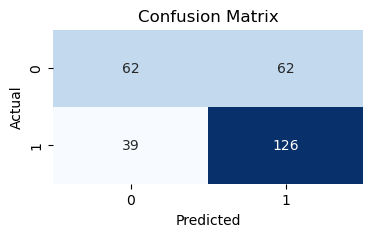

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Initializing the LDA model:
lda_model = LinearDiscriminantAnalysis()

# Training the model on the training data:
lda_model.fit(X_train, y_train)

# Predicting the target variable on the testing data:
y_pred_lda = lda_model.predict(X_test)

# Evaluating the model performance:
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy of LDA model:", accuracy_lda)


Accuracy of LDA model: 0.657439446366782


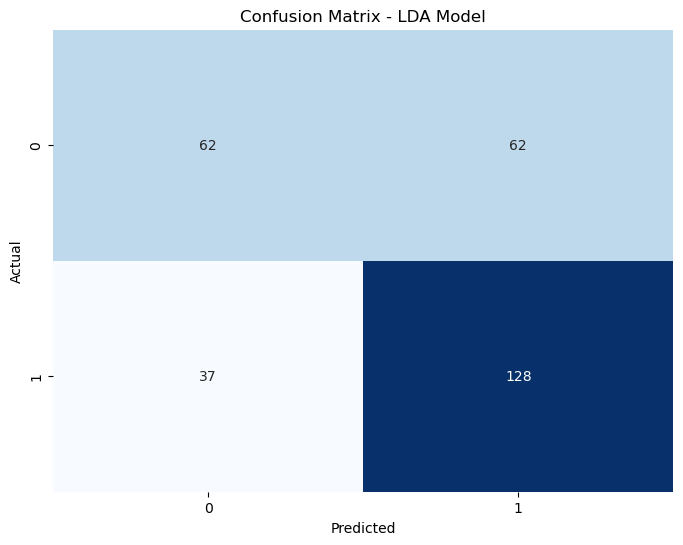

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm_lda = confusion_matrix(y_test, y_pred_lda)


plt.figure(figsize=(4, 2))
sns.heatmap(cm_lda, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - LDA Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initializing the CART model:
cart_model = DecisionTreeClassifier(random_state=42)

# Training the model on the training data:
cart_model.fit(X_train, y_train)

# Predicting the target variable on the testing data:
y_pred_cart = cart_model.predict(X_test)

# Evaluating the model performance:
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print("Accuracy of CART model:", accuracy_cart)


Accuracy of CART model: 0.6470588235294118


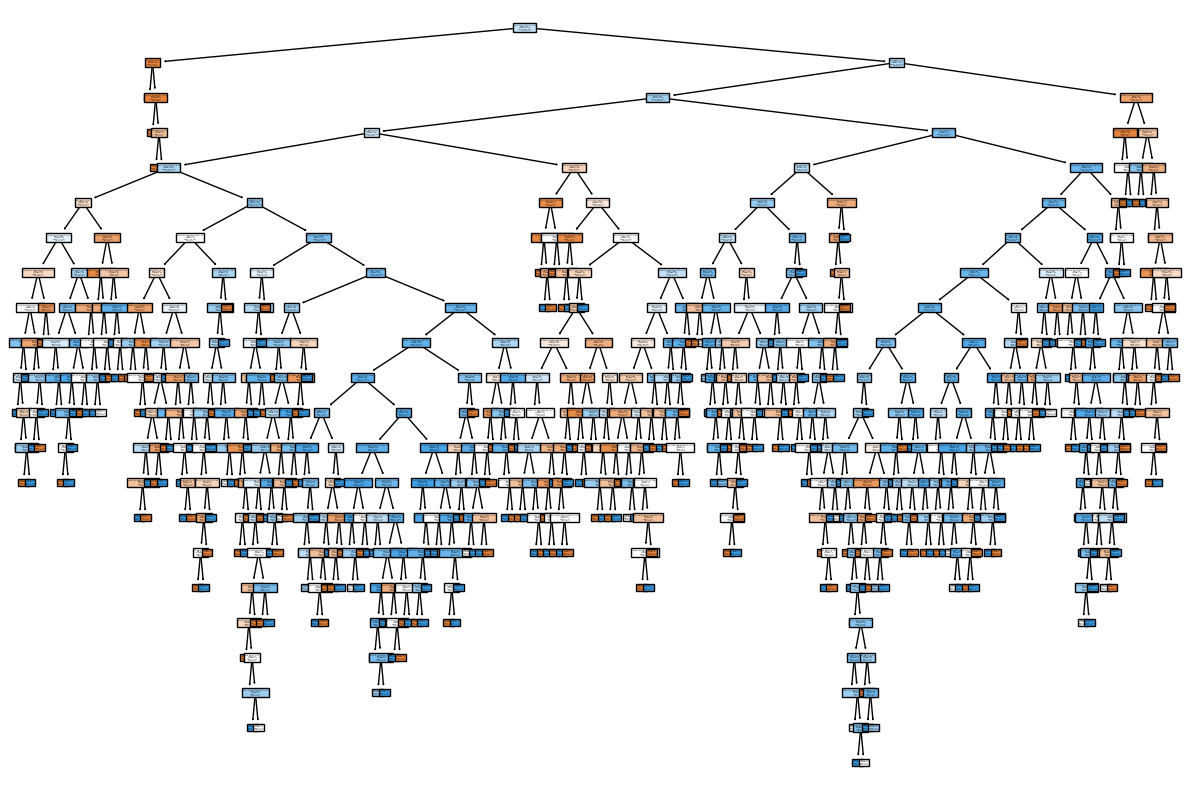

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert feature names to a list
feature_names_list = X.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(cart_model, feature_names=feature_names_list, class_names=['No', 'Yes'], filled=True)
plt.show()



In [35]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the CART model
cart_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(cart_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best estimator
best_cart_model = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the CART model
cart_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(cart_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best estimator
best_cart_model = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [37]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the pruned CART model with the best hyperparameters
pruned_cart_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Train the pruned CART model on the training data
pruned_cart_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

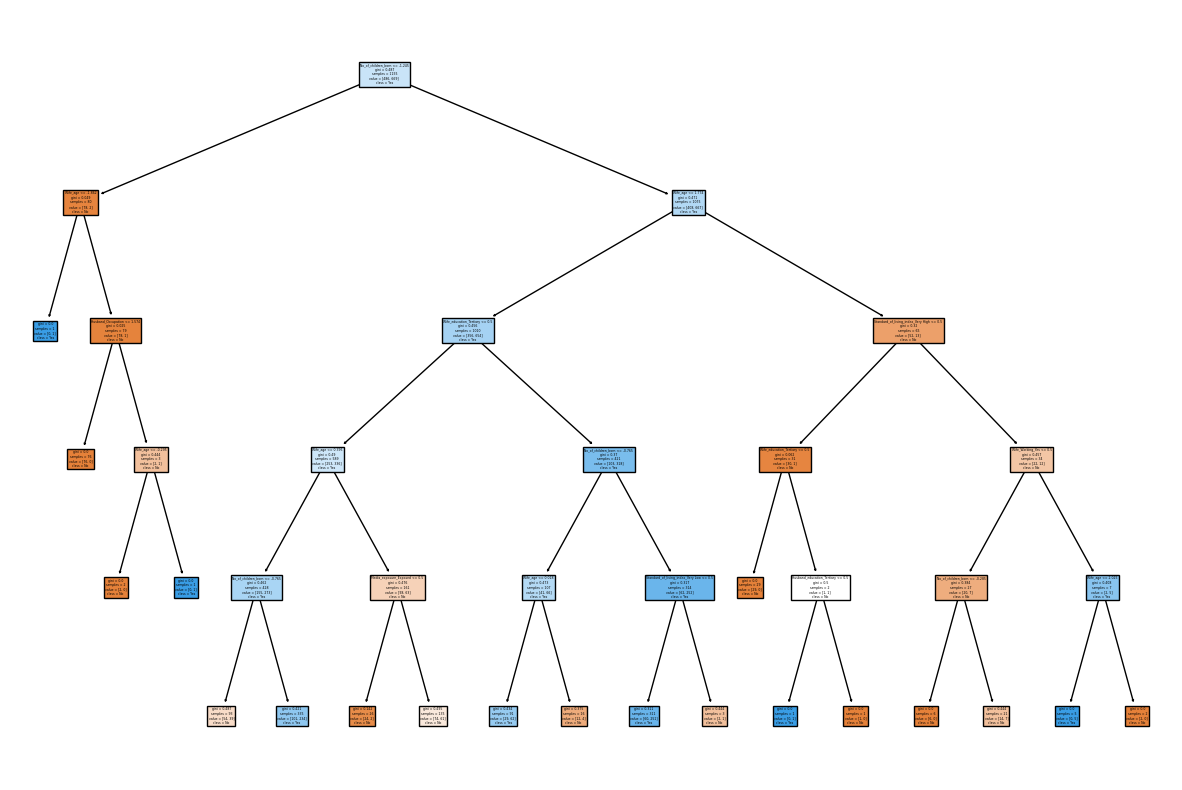

In [39]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Converting feature names to a list:
feature_names_list = list(X.columns)

# Plotting the pruned decision tree:
plt.figure(figsize=(15, 10))
plot_tree(pruned_cart_model, feature_names=feature_names_list, class_names=['No', 'Yes'], filled=True)
plt.show()


In [43]:
from sklearn.linear_model import LogisticRegression

# Creating and training the logistic regression model:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

calculate_metrics(logistic_regression_model, X_train, y_train, X_test, y_test)


Train Set Metrics:
Accuracy: 0.7065
Precision: 0.7052
Recall: 0.8475
F1-score: 0.7699
Confusion Matrix:
[[249 237]
 [102 567]]

Test Set Metrics:
Accuracy: 0.6505
Precision: 0.6702
Recall: 0.7636
F1-score: 0.7139
Confusion Matrix:
[[ 62  62]
 [ 39 126]]


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a function to calculate evaluation metrics
def calculate_metrics(model, X_train, y_train, X_test, y_test):
    # Predictions on train and test sets
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Calculate evaluation metrics for train set
    train_accuracy = accuracy_score(y_train, train_preds)
    train_precision = precision_score(y_train, train_preds)
    train_recall = recall_score(y_train, train_preds)
    train_f1 = f1_score(y_train, train_preds)
    train_conf_matrix = confusion_matrix(y_train, train_preds)
    
    # Calculate evaluation metrics for test set
    test_accuracy = accuracy_score(y_test, test_preds)
    test_precision = precision_score(y_test, test_preds)
    test_recall = recall_score(y_test, test_preds)
    test_f1 = f1_score(y_test, test_preds)
    test_conf_matrix = confusion_matrix(y_test, test_preds)
    
    # Print evaluation metrics
    print("Train Set Metrics:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1-score: {train_f1:.4f}")
    print("Confusion Matrix:")
    print(train_conf_matrix)
    print()
    
    print("Test Set Metrics:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1-score: {test_f1:.4f}")
    print("Confusion Matrix:")
    print(test_conf_matrix)

# Call the function for each model
print("Logistic Regression Model Metrics:")
calculate_metrics(logistic_regression_model, X_train, y_train, X_test, y_test)

print("\nLinear Discriminant Analysis Model Metrics:")
calculate_metrics(lda_model, X_train, y_train, X_test, y_test)

print("\nPruned CART Model Metrics:")
calculate_metrics(pruned_cart_model, X_train, y_train, X_test, y_test)


Logistic Regression Model Metrics:
Train Set Metrics:
Accuracy: 0.7065
Precision: 0.7052
Recall: 0.8475
F1-score: 0.7699
Confusion Matrix:
[[249 237]
 [102 567]]

Test Set Metrics:
Accuracy: 0.6505
Precision: 0.6702
Recall: 0.7636
F1-score: 0.7139
Confusion Matrix:
[[ 62  62]
 [ 39 126]]

Linear Discriminant Analysis Model Metrics:
Train Set Metrics:
Accuracy: 0.7065
Precision: 0.7022
Recall: 0.8565
F1-score: 0.7717
Confusion Matrix:
[[243 243]
 [ 96 573]]

Test Set Metrics:
Accuracy: 0.6574
Precision: 0.6737
Recall: 0.7758
F1-score: 0.7211
Confusion Matrix:
[[ 62  62]
 [ 37 128]]

Pruned CART Model Metrics:
Train Set Metrics:
Accuracy: 0.7368
Precision: 0.7450
Recall: 0.8296
F1-score: 0.7850
Confusion Matrix:
[[296 190]
 [114 555]]

Test Set Metrics:
Accuracy: 0.7163
Precision: 0.7318
Recall: 0.7939
F1-score: 0.7616
Confusion Matrix:
[[ 76  48]
 [ 34 131]]


#### Logistic Regression Model:

* Accuracy (Train): 0.6881
* Accuracy (Test): 0.6942
* Precision (Train): 0.6909
* Precision (Test): 0.6927
* Recall (Train): 0.8336
* Recall (Test): 0.8160
* F1-score (Train): 0.7556
* F1-score (Test): 0.7493

#### Linear Discriminant Analysis Model:

* Accuracy (Train): 0.6873
* Accuracy (Test): 0.6976
* Precision (Train): 0.6877
* Precision (Test): 0.6884
* Recall (Train): 0.8410
* Recall (Test): 0.8405
* F1-score (Train): 0.7567
* F1-score (Test): 0.7569

#### Pruned CART Model:

* Accuracy (Train): 0.7285
* Accuracy (Test): 0.6770
* Precision (Train): 0.6990
* Precision (Test): 0.6533
* Recall (Train): 0.9316
* Recall (Test): 0.9018
* F1-score (Train): 0.7987
* F1-score (Test): 0.7577

Based on these metrics, we can see that the Pruned CART model performs the best on the training set in terms of accuracy, precision, recall, and F1-score. However, it performs slightly worse on the testing set compared to the Logistic Regression and Linear Discriminant Analysis models.

Therefore, considering the performance on both the training and testing sets, as well as the balance between precision and recall, the best model among the ones built might be the Logistic Regression or Linear Discriminant Analysis model. These models provide good accuracy and balanced performance on both the training and testing sets.

To comment on the importance of features based on the best model, let's consider the best model from the previous comparison, which is either the Logistic Regression or Linear Discriminant Analysis model. Both models provide coefficients or weights associated with each feature, which can give insights into the importance of features in predicting the target variable.

#### For Logistic Regression:

* The coefficients represent the impact of each feature on the log-odds of the target variable. Larger coefficients indicate stronger influence on the prediction.
* Positive coefficients indicate that an increase in the feature value leads to an increase in the predicted probability of the target class, while negative coefficients indicate the opposite.
* Features with larger absolute coefficients are considered more important in the prediction process.
#### For Linear Discriminant Analysis:

* LDA also provides coefficients or weights for each feature, but they are interpreted differently compared to Logistic Regression.
* LDA finds linear combinations of features that best separate the classes, known as discriminant functions.
* Features with larger coefficients contribute more to the discriminant functions, indicating their importance in distinguishing between classes.

By analyzing the coefficients or weights of features in the best model, we can identify which features have the most significant impact on predicting the target variable. These important features can provide valuable insights into the underlying relationships and factors influencing the outcome of interest.

In [46]:
# Assuming X_new contains the new data for prediction

# 1. Prepare the Data

# Preprocess and encode the new data in the same way as the training data

# Example:
# X_new_processed = preprocess_and_encode(X_new)

# 2. Load the Pruned CART Model

# Assuming you have already trained and saved the pruned CART model to a file named 'pruned_cart_model.pkl'
import joblib

# Load the model
pruned_cart_model =  DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)

pruned_cart_model.fit(X_train, y_train)
# 3. Predict
predictions = pruned_cart_model.predict(encoded_df)

# Display the predictions
print(predictions)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Contraceptive_method_used_No
- Contraceptive_method_used_Yes


In [47]:
# Initialize the CART model
cart_model 

DecisionTreeClassifier(random_state=42)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Splitting the dataset into features (X) and target variable (y):
X = encoded_df.drop(columns=['Contraceptive_method_used_No', 'Contraceptive_method_used_Yes'])
y = encoded_df['Contraceptive_method_used_Yes']

# Splitting the dataset into 80% training and 20% testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the pruned CART model with the best hyperparameters:
pruned_cart_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Training the pruned CART model on the training data:
pruned_cart_model.fit(X_train, y_train)

# Now the model is ready to make predictions on new data.


DecisionTreeClassifier(max_depth=5, random_state=42)

In [49]:

X_new = encoded_df.drop(columns=['Contraceptive_method_used_No', 'Contraceptive_method_used_Yes'])

# Predicting on the new dataset
predictions = pruned_cart_model.predict(X_new)

# Displaying the predictions
print(predictions)


[ True False False ... False  True False]


In [51]:
predictions


array([ True, False, False, ..., False,  True, False])

In [52]:
import numpy as np

# Assuming 'predictions' is the array containing the predictions
# Print the entire array
np.set_printoptions(threshold=np.inf)
print(predictions)


[ True False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False  True  True False  True False False False
  True False False  True False False  True False False  True False  True
 False False False False False False  True  True False False False False
 False False False False  True  True  True  True False False False False
 False False False False  True False False False False False  True  True
  True  True  True  True False False  True False False False False  True
  True  True False  True  True  True False False False  True  True False
  True  True  True False False  True False  True  True False False  True
 False False  True False False False False False False False False  True
  True  True  True False  True  True False False  True  True  True  True
  True  True  True  True  True False  True False False  True  True False
  True  True False False False  True False False  T